In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from hashlib import md5 

In [2]:
properties_qm9 = ['G', 'H', 'L']
subsets = [-1, 0, 1, 2]
train_sizes_qm9 = {-1: 64000, 0:32000, 1:32000, 2:16000}
sigmas_qm9 = {-1: 256.0, 0: 256.0, 1: 256.0, 2: 256.0}
res_qm9 = {}
for p in properties_qm9:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm9[sub]
        n_train = train_sizes_qm9[sub]
        text = f'qm9 loop {p} {sub} slatm laplacian {sig} -12 {n_train}'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm9[p] = res_p

In [3]:
res_qm9['G'][0]['Y_ref'].keys()

dict_keys([1000, 2000, 4000, 8000, 16000, 32000])

In [4]:
res_qm9['G'][-1][0]['Y_ref'].keys()

dict_keys([1000, 2000, 4000, 8000, 16000, 32000, 64000])

In [5]:
res_qm9['G'][-1][0].keys()

dict_keys(['Y_ref', 'Y_pred', 'train_ind', 'test_ind'])

In [6]:
def scatter_subplot(ax, y_ref_tot, y_pred_tot, y_ref_sub, y_pred_sub, color_tot, color_sub, label, xticks, fs):
    
    ax.scatter(y_ref_tot, y_pred_tot, marker='.', color=color_tot, label=label[0])
    ax.scatter(y_ref_sub, y_pred_sub, marker='.', color=color_sub, label=label[1])

    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    
    xlow = xticks[0] - (xticks[1] - xticks[0]) / 2
    xhigh = xticks[-1] + (xticks[-1] - xticks[-2]) / 2
    
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(xlow, xhigh)
    
    x_ideal = np.linspace(xlow, xhigh, num=100, endpoint=True)
    ax.plot(x_ideal, x_ideal, color='black', lw=2.)

    ax.tick_params(axis='both', labelsize=fs, direction='in', length=5, width=2.)

    for side, sp in ax.spines.items():
        sp.set_linewidth(2.)
        
    return ax

In [7]:
def get_min_max_values(res, sub, n_train):
    
    ymin = min(np.amin(res[-1][sub]['Y_ref'][n_train]), np.amin(res[-1][sub]['Y_pred'][n_train]))
    ymax = max(np.amax(res[-1][sub]['Y_ref'][n_train]), np.amax(res[-1][sub]['Y_pred'][n_train]))
    
    ymin_sub = min(np.amin(res[sub]['Y_ref'][n_train]), np.amin(res[sub]['Y_pred'][n_train]))
    ymax_sub = max(np.amax(res[sub]['Y_ref'][n_train]), np.amax(res[sub]['Y_pred'][n_train]))
    
    return (min(ymin, ymin_sub), max(ymax, ymax_sub))

In [8]:
def single_scatter_plot(res, sub, n_train, color, color_sub, labels, xticks, save=False, filename='figure.png'):
    
    fs = 16.
    
    fig = plt.figure(figsize=(2.4, 2.4), dpi=200)
    ax = fig.add_subplot(111)
    
    y_ref = res[-1][sub]['Y_ref'][n_train]
    y_pred = res[-1][sub]['Y_pred'][n_train]
    
    y_ref_sub = res[sub]['Y_ref'][n_train]
    y_pred_sub = res[sub]['Y_pred'][n_train]
    
    ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_sub, labels, xticks, fs)
    
    ax.set_xticklabels(xticks)
    ax.set_yticklabels(xticks)
    
    ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
              bbox_to_anchor=(1, 1.5), handletextpad=.2)
    
    if save:
        plt.savefig(filename)
        
    return

In [9]:
def get_outlier_indices(res_p, sub, n_train, n_outliers):
    
    y_ref = res_p[-1][sub]['Y_ref'][n_train]
    y_pred = res_p[-1][sub]['Y_pred'][n_train]
    
    y_ref_sub = res_p[sub]['Y_ref'][n_train]
    y_pred_sub = res_p[sub]['Y_pred'][n_train]
    
    # differences
    diff = np.abs(y_ref - y_pred)
    diff_sub = np.abs(y_ref_sub - y_pred_sub)
    
    # sorting of differences
    diff_sort = np.flip(np.argsort(diff))
    diff_sub_sort = np.flip(np.argsort(diff_sub))
    
    # indices
    test_ind = res_p[-1][sub]['test_ind'][n_train]
    test_ind_sub = res_p[sub]['test_ind'][n_train]
    
    outlier_ind = test_ind[diff_sort[:n_outliers]]
    outlier_ind_sub = test_ind_sub[diff_sub_sort[:n_outliers]]
    
    ind_dict = {'y_ref': y_ref[diff_sort[:n_outliers]], 
                'y_pred': y_pred[diff_sort[:n_outliers]], 
                'ind': outlier_ind}
    ind_dict_sub = {'y_ref': y_ref_sub[diff_sub_sort[:n_outliers]], 
                    'y_pred': y_pred_sub[diff_sub_sort[:n_outliers]], 
                    'ind': outlier_ind_sub}
    
    return (ind_dict, ind_dict_sub)

In [10]:
get_min_max_values(res_qm9['G'], 0, 32000)

(1.6326831747592798, 8.672268796596375)

In [11]:
xticks_qm9 = {}
xticks_qm9['G'] = {}
xticks_qm9['G'][0] = [2, 4, 6, 8]

In [12]:
labels_qm9 = {}
labels_qm9[0] = ['arom./C=O', 'arom./C=O (c)']

In [13]:
labels_qm9[0]

['arom./C=O', 'arom./C=O (c)']

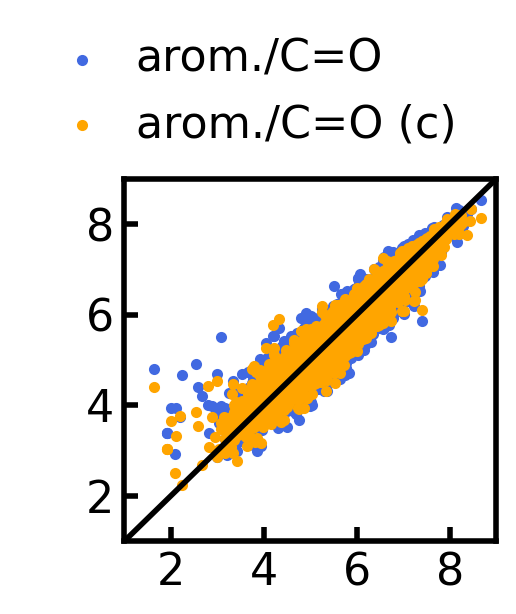

In [14]:
single_scatter_plot(res_qm9['G'], 0, 32000, 'royalblue', 'orange', labels_qm9[0], xticks_qm9['G'][0])

In [15]:
no = 5

In [16]:
get_outlier_indices(res_qm9['G'], 0, 32000, no)

({'y_ref': array([1.63268317, 2.23405481, 3.07760778, 2.55242803, 2.01364258]),
  'y_pred': array([4.80427243, 4.67399652, 5.50282421, 4.92399409, 3.94741651]),
  'ind': array([130452, 130369, 130365, 129392,  51245])},
 {'y_ref': array([1.63268317, 2.01364258, 2.79188823, 4.33477383, 2.20412229]),
  'y_pred': array([4.4136484 , 3.66466329, 4.42199487, 5.90499462, 3.77386982]),
  'ind': array([54292, 26003,  9134, 54289, 46455])})

In [17]:
o_ind_qm9 = {}
o_ind_qm9['G'] = {}
o_ind_qm9['G'][-1] = {}

o_ind_qm9['G'][-1][0], o_ind_qm9['G'][0] = get_outlier_indices(res_qm9['G'], 0, 32000, no)

In [18]:
o_ind_qm9

{'G': {-1: {0: {'y_ref': array([1.63268317, 2.23405481, 3.07760778, 2.55242803, 2.01364258]),
    'y_pred': array([4.80427243, 4.67399652, 5.50282421, 4.92399409, 3.94741651]),
    'ind': array([130452, 130369, 130365, 129392,  51245])}},
  0: {'y_ref': array([1.63268317, 2.01364258, 2.79188823, 4.33477383, 2.20412229]),
   'y_pred': array([4.4136484 , 3.66466329, 4.42199487, 5.90499462, 3.77386982]),
   'ind': array([54292, 26003,  9134, 54289, 46455])}}}

In [19]:
def get_dataind_from_classind(subset, labels, class_ind):
    
    subset_ind = np.where(labels == subset)[0]
    orig_ind = subset_ind[class_ind]

    return orig_ind

In [23]:
import sys

In [24]:
sys.path.insert(1, '../../xyz2mol/')

In [25]:
from xyz2mol import xyz2mol

RDKit WARNING: [17:14:00] Enabling RDKit 2019.09.3 jupyter extensions


In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

In [27]:
def get_rdkit_mol(ind, Z, C):
    
    Zi = Z[ind].astype(int)
    Ci = C[ind]
    Ci = Ci[np.where(Zi != 0)]
    Zi = Zi[np.where(Zi != 0)].tolist()
    # print(Zi, Ci)
    mol = xyz2mol(Zi, Ci)
    if mol:
        AllChem.Compute2DCoords(mol[0])
        return mol[0]
    else:
        return None


def draw_mols_by_indices(ind_dict, sub, labels, Z, C):
    
    ind = ind_dict[-1][sub]['ind']
    ind_sub = ind_dict[sub]['ind']
    
    y_ref = ind_dict[-1][sub]['y_ref']
    y_pred = ind_dict[-1][sub]['y_pred']
    
    y_ref_sub = ind_dict[sub]['y_ref']
    y_pred_sub = ind_dict[sub]['y_pred']

    orig_ind_sub = get_dataind_from_classind(sub, labels, ind_sub)
    
    mols = [get_rdkit_mol(i, Z, C) for i in ind]
    mols_sub = [get_rdkit_mol(i, Z, C) for i in orig_ind_sub if get_rdkit_mol(i, Z, C) is not None]
    
    print('Ref :', y_ref)
    print('Pred :', y_pred)
    print('Ref (sub) :', y_ref_sub)
    print('Pred (sub) :', y_pred_sub)
    
    return (mols, mols_sub)

In [29]:
xticks_qm9['G'][1] = [1, 3, 5, 7, 9]
labels_qm9[1] = ['single unsat.', 'single unsat. (c)']

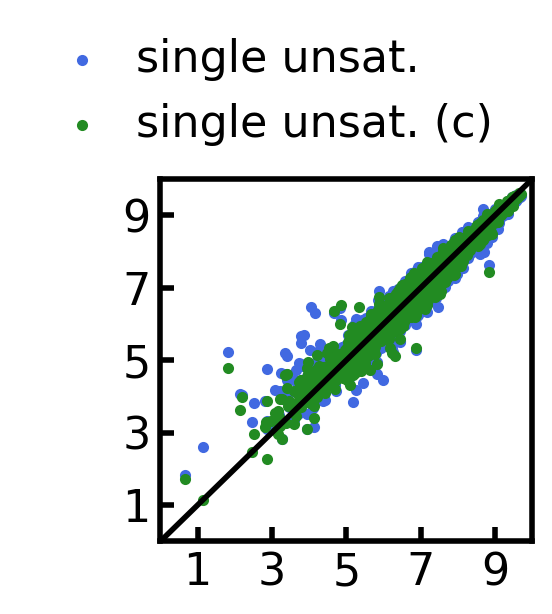

In [30]:
single_scatter_plot(res_qm9['G'], 1, 32000, 'royalblue', 'forestgreen', labels_qm9[1], xticks_qm9['G'][1])

In [31]:
o_ind_qm9['G'][-1][1], o_ind_qm9['G'][1] = get_outlier_indices(res_qm9['G'], 1, 32000, no)

In [33]:
get_min_max_values(res_qm9['G'], 2, 16000)

(2.2394970880448124, 16.928203383629135)

In [34]:
xticks_qm9['G'][2] = [4, 8, 12, 16]
labels_qm9[2] = ['saturated', 'saturated (c)']

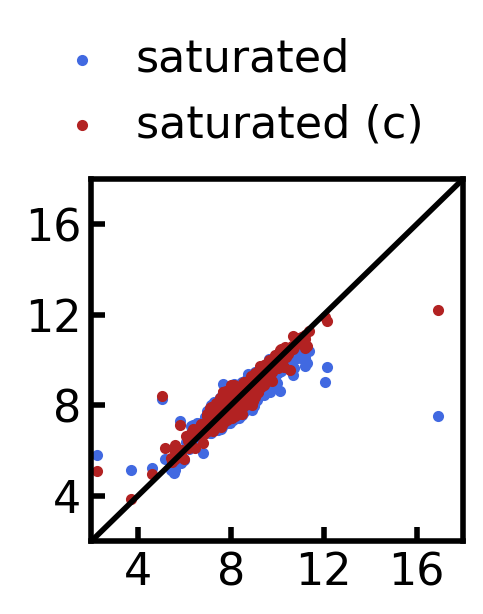

In [35]:
single_scatter_plot(res_qm9['G'], 2, 16000, 'royalblue', 'firebrick', labels_qm9[2], xticks_qm9['G'][2])

In [337]:
o_ind_qm9['G'][-1][2], o_ind_qm9['G'][2] = get_outlier_indices(res_qm9['G'], 2, 16000, no)

In [377]:
o_ind_qm9['G'][-1][2]

{'y_ref': array([16.92820338,  2.23949709,  5.05043329, 12.04375955, 12.14988396]),
 'y_pred': array([7.52563251, 5.82571716, 8.27603869, 9.04139327, 9.71255852]),
 'ind': array([   183, 133865, 133862,      6,    830])}

In [372]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['G'], 2, labels, X['Z'], X['C'])

Ref : [16.92820338  2.23949709  5.05043329 12.04375955 12.14988396]
Pred : [7.52563251 5.82571716 8.27603869 9.04139327 9.71255852]
Ref (sub) : [16.92820338  5.05043329  2.23949709  5.82051552 10.560739  ]
Pred (sub) : [12.22777299  8.40780555  5.11304848  7.11802564  9.54271259]


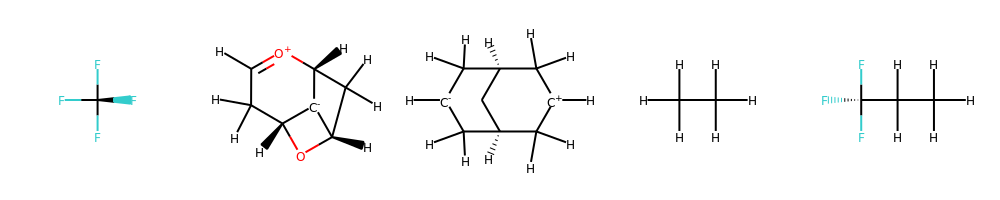

In [373]:
Draw.MolsToGridImage(mols, molsPerRow=no)

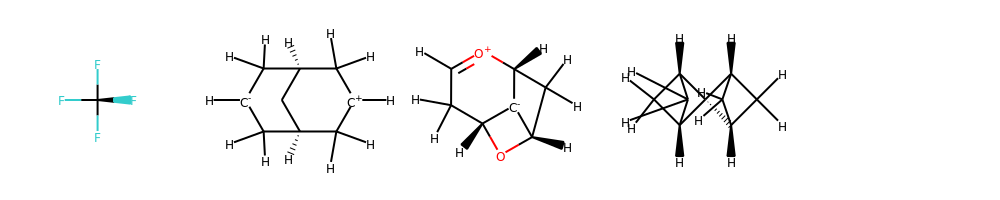

In [375]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [36]:
from matplotlib import gridspec

In [37]:
def scatter_subplots_row(res, subsets, train_sizes, color, color_subsets, labels_subsets, xticks_subsets, 
                         save=False, filename='figure.png'):
    
    fs = 16.
    
    fig = plt.figure(figsize=(7.2, 2.4), dpi=200)
    gs = gridspec.GridSpec(1, 3, figure=fig, hspace=0.1)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]
    
    for i, (ax, sub) in enumerate(zip(axs, subsets)):
        
        n_train = train_sizes[i]
        y_ref = res[-1][sub]['Y_ref'][n_train]
        y_pred = res[-1][sub]['Y_pred'][n_train]
    
        y_ref_sub = res[sub]['Y_ref'][n_train]
        y_pred_sub = res[sub]['Y_pred'][n_train]
        
        ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_subsets[i], labels_subsets[i], xticks_subsets[i], fs)
        
        ax.set_xticklabels(xticks_subsets[i])
        ax.set_yticklabels(xticks_subsets[i])
        
        ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                  bbox_to_anchor=(.5, 1.2), handletextpad=0., loc='center')
        
    if save:
        plt.savefig(filename)
        
    return

In [38]:
train_sizes_qm9 = [32000, 32000, 16000]
color_subsets = ['orange', 'forestgreen', 'firebrick']

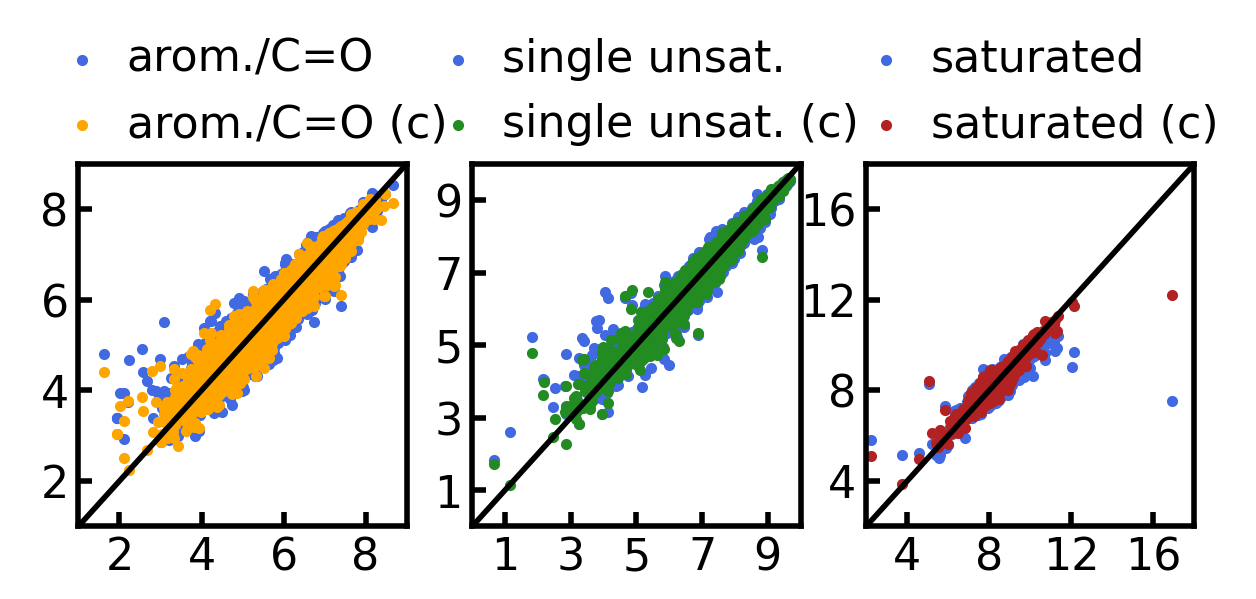

In [39]:
scatter_subplots_row(res_qm9['G'], [0, 1, 2], train_sizes_qm9, 'royalblue', color_subsets, labels_qm9, xticks_qm9['G'])

In [40]:
def scatter_subplots_array(res, props, subsets, train_sizes, color, color_subsets, labels_subsets, xticks_subsets, y_labels, 
                           save=False, filename='figure.png'):
    
    fs = 16.
    
    fig = plt.figure(figsize=(7.2, 7.2), dpi=200)
    gs = gridspec.GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.3)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2]), 
           fig.add_subplot(gs[3]), fig.add_subplot(gs[4]), fig.add_subplot(gs[5]), 
           fig.add_subplot(gs[6]), fig.add_subplot(gs[7]), fig.add_subplot(gs[8])]
    
    for i, p in enumerate(props):
        
        for j, (ax, sub) in enumerate(zip(axs[i*3:(i+1)*3], subsets)):

            n_train = train_sizes[j]
            y_ref = res[p][-1][sub]['Y_ref'][n_train]
            y_pred = res[p][-1][sub]['Y_pred'][n_train]

            y_ref_sub = res[p][sub]['Y_ref'][n_train]
            y_pred_sub = res[p][sub]['Y_pred'][n_train]

            ax = scatter_subplot(ax, y_ref, y_pred, y_ref_sub, y_pred_sub, color, color_subsets[j], labels_subsets[j], xticks_subsets[p][j], fs)

            ax.set_xticklabels(xticks_subsets[p][j])
            ax.set_yticklabels(xticks_subsets[p][j])
            
            if i == 0:
                ax.legend(fontsize=fs, frameon=False, bbox_transform=ax.transAxes, 
                          bbox_to_anchor=(.5, 1.4), handletextpad=0., loc='center')
                n_train = train_sizes[sub]
                ax.set_title(r'$N_{\mathrm{tr}} = $%i'%n_train, fontsize=fs)
                
    # axs[3].set_ylabel(r'$y_{\mathrm{pred}}$ [eV]', fontsize=fs)
#     axs[0].set_ylabel(y_labels[0], fontsize=fs)
#     axs[3].set_ylabel(y_labels[1], fontsize=fs)
#     axs[6].set_ylabel(y_labels[2], fontsize=fs)
    axs[7].set_xlabel(r'$y_{\mathrm{ref}}$ [eV]', fontsize=fs)
        
    if save:
        plt.savefig(filename, bbox_inches='tight')
        
    return

In [41]:
get_min_max_values(res_qm9['H'], 0, 32000)

(-9.679090087697931, -3.2027801611527873)

In [42]:
get_min_max_values(res_qm9['H'], 1, 32000)

(-10.783872369285044, -2.8435898627057457)

In [43]:
get_min_max_values(res_qm9['H'], 2, 16000)

(-11.662800145030456, -4.28579333374311)

In [44]:
xticks_qm9['H'] = {0: [-9, -7, -5, -3], 
                   1: [-10, -8, -6, -4, -2], 
                   2: [-11, -9, -7, -5]}

In [45]:
get_min_max_values(res_qm9['L'], 0, 32000)

(-4.508926700960211, 1.9973157504555192)

In [46]:
get_min_max_values(res_qm9['L'], 1, 32000)

(-3.039511843676859, 1.9184027303421538)

In [47]:
get_min_max_values(res_qm9['L'], 2, 16000)

(-2.0462962456982976, 5.265403238598678)

In [48]:
xticks_qm9['L'] = {0: [-4, -2, 0, 2], 
                   1: [-3, -2, -1, 0, 1, 2], 
                   2: [-2, 0, 2, 4, 6]}

In [49]:
props = ['G', 'H', 'L']

In [50]:
xticks_qm9

{'G': {0: [2, 4, 6, 8], 1: [1, 3, 5, 7, 9], 2: [4, 8, 12, 16]},
 'H': {0: [-9, -7, -5, -3], 1: [-10, -8, -6, -4, -2], 2: [-11, -9, -7, -5]},
 'L': {0: [-4, -2, 0, 2], 1: [-3, -2, -1, 0, 1, 2], 2: [-2, 0, 2, 4, 6]}}

In [51]:
title_gap = r'$\Delta \epsilon$'
title_homo = r'$\epsilon^{\mathrm{HOMO}}$'
title_lumo = r'$\epsilon^{\mathrm{LUMO}}$'
y_labels = [title_gap, title_homo, title_lumo]

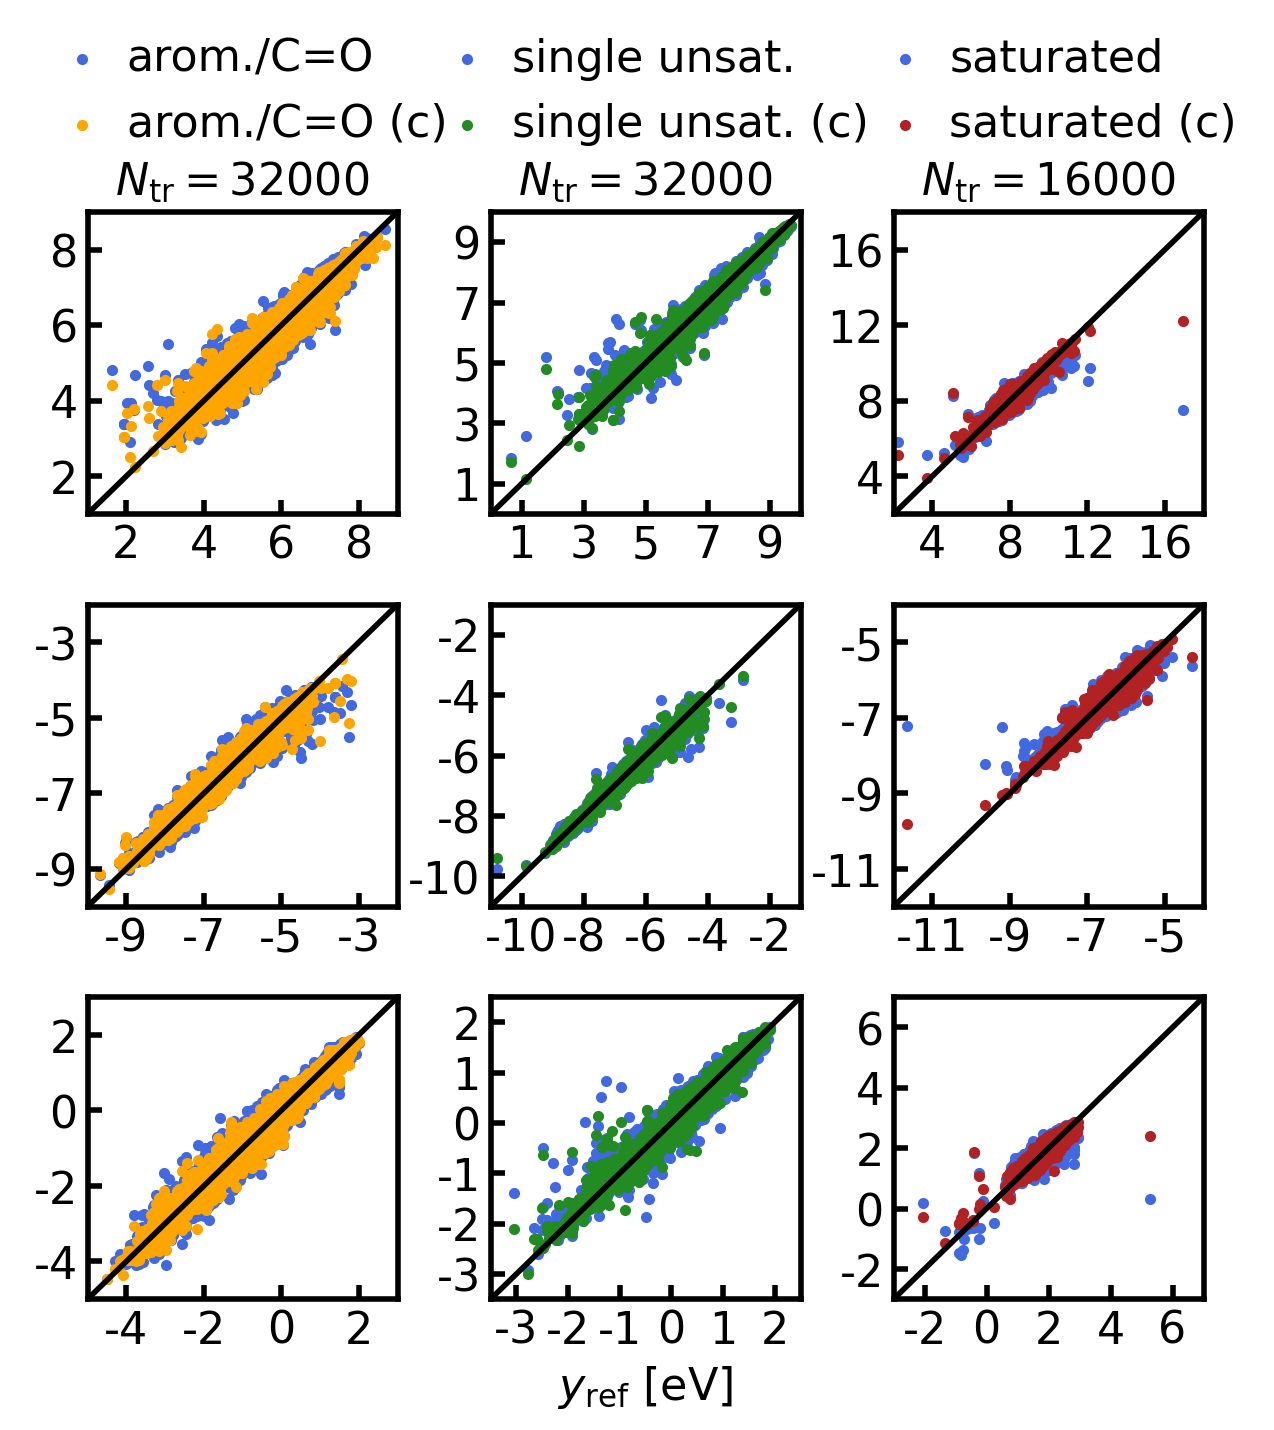

In [52]:
scatter_subplots_array(res_qm9, props, [0, 1, 2], train_sizes_qm9, 'royalblue', color_subsets, labels_qm9, xticks_qm9, y_labels, 
                       False, 'figures/tmp/scatter_qm9.png')

In [379]:
o_ind_qm9['H'] = {}
o_ind_qm9['H'][-1] = {}

In [382]:
Z = X['Z']
C = X['C']

In [381]:
o_ind_qm9['H'][-1][0], o_ind_qm9['H'][0] = get_outlier_indices(res_qm9['H'], 0, 32000, no)
o_ind_qm9['H'][-1][1], o_ind_qm9['H'][1] = get_outlier_indices(res_qm9['H'], 1, 32000, no)
o_ind_qm9['H'][-1][2], o_ind_qm9['H'][2] = get_outlier_indices(res_qm9['H'], 2, 16000, no)

Ref : [-3.25992407 -4.49259987 -4.21504373 -3.20278016 -4.51164784]
Pred : [-5.51890545 -6.0555964  -5.69104946 -4.6700709  -5.90655309]
Ref (sub) : [-3.25992407 -4.01095833 -3.64360462 -4.7130121  -3.48849972]
Pred (sub) : [-5.13192887 -5.61965955 -4.98071119 -5.81333214 -4.56699145]


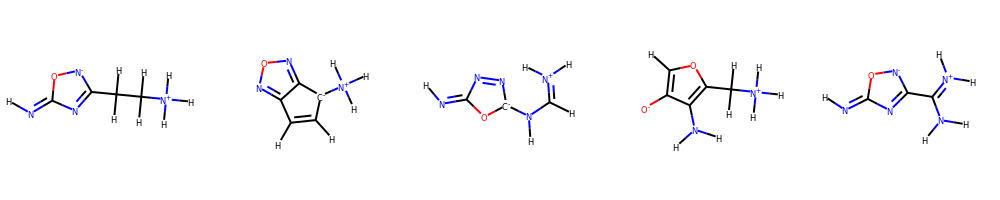

In [383]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['H'], 0, labels, Z, C)
Draw.MolsToGridImage(mols, molsPerRow=no)

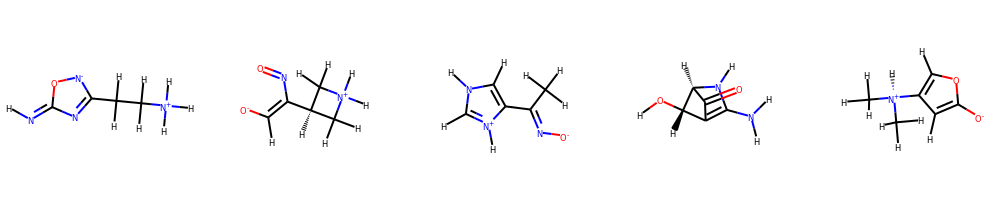

In [384]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [-3.2544818  -4.28579333 -4.63137794 -5.50758458 -4.53613809]
Pred : [-4.89359754 -5.70626782 -6.05097288 -4.16412882 -5.7806534 ]
Ref (sub) : [-10.78387237  -3.2544818   -4.28579333  -5.13750972  -4.15789982]
Pred (sub) : [-9.40431908 -4.40173796 -5.42070565 -6.09454034 -5.00749107]


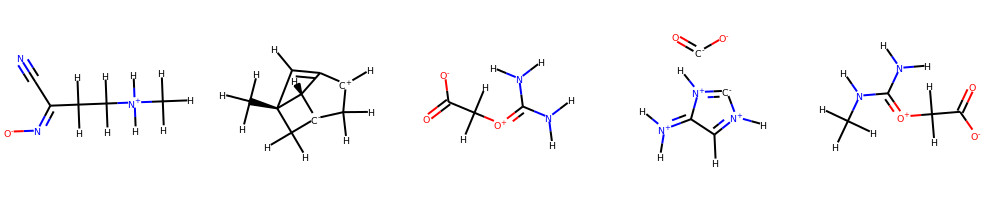

In [385]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['H'], 1, labels, Z, C)
Draw.MolsToGridImage(mols, molsPerRow=no)

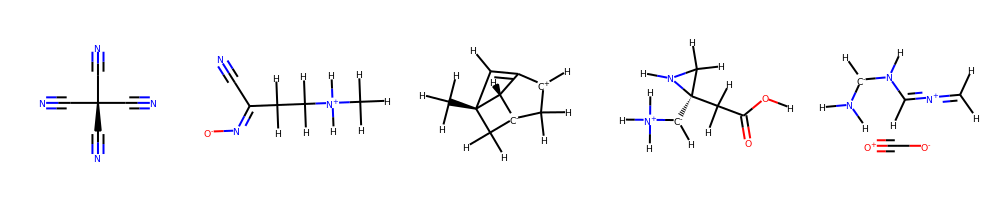

In [386]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [387]:
o_ind_qm9['H'][-1][1]

{'y_ref': array([-3.2544818 , -4.28579333, -4.63137794, -5.50758458, -4.53613809]),
 'y_pred': array([-4.89359754, -5.70626782, -6.05097288, -4.16412882, -5.7806534 ]),
 'ind': array([ 22494, 133853,   6074,  25828,  96678])}

Ref : [-11.66280015  -9.21105424  -9.64099415  -4.28579333  -5.46404636]
Pred : [-7.2132461  -7.2509138  -8.22762948 -5.63794344 -6.43192902]
Ref (sub) : [-11.66280015  -4.28579333  -5.46404636  -7.57564993  -7.65184181]
Pred (sub) : [-9.80831338 -5.37998958 -6.53233499 -6.83491295 -7.01573866]


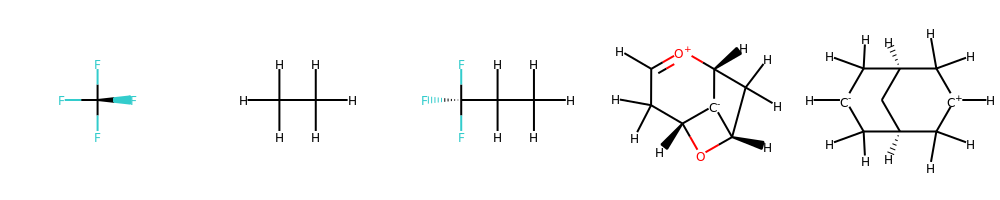

In [388]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['H'], 2, labels, Z, C)
Draw.MolsToGridImage(mols, molsPerRow=no)

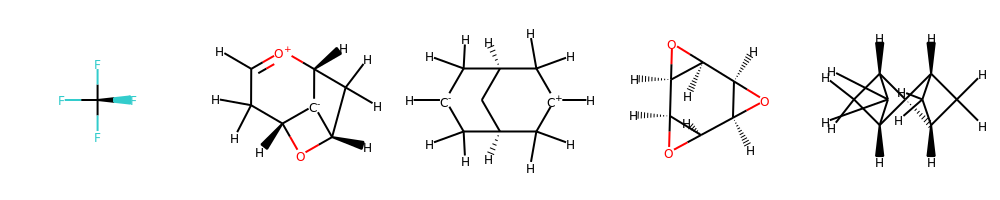

In [389]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [390]:
o_ind_qm9['L'] = {}
o_ind_qm9['L'][-1] = {}

o_ind_qm9['L'][-1][0], o_ind_qm9['L'][0] = get_outlier_indices(res_qm9['L'], 0, 32000, no)
o_ind_qm9['L'][-1][1], o_ind_qm9['L'][1] = get_outlier_indices(res_qm9['L'], 1, 32000, no)
o_ind_qm9['L'][-1][2], o_ind_qm9['L'][2] = get_outlier_indices(res_qm9['L'], 2, 16000, no)

Ref : [-1.27077174 -2.48167843 -1.3524059  -1.67622139 -0.96600421]
Pred : [ 0.82872488 -0.49661505  0.50757679  0.01524008  0.7099942 ]
Ref (sub) : [-2.48167843 -1.42859778 -1.92384501 -1.45308803  0.47347812]
Pred (sub) : [-0.63558256  0.13434043 -0.58205794 -0.24310125 -0.55864041]


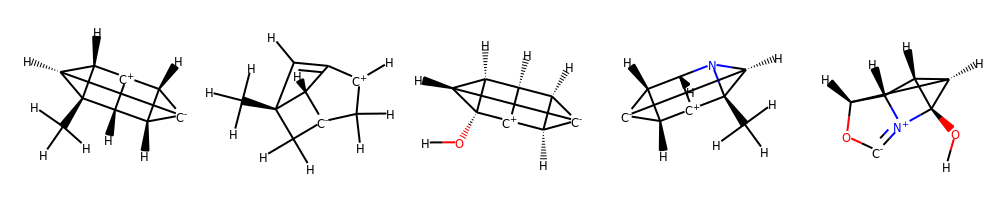

In [392]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['L'], 1, labels, Z, C)
Draw.MolsToGridImage(mols, molsPerRow=no)

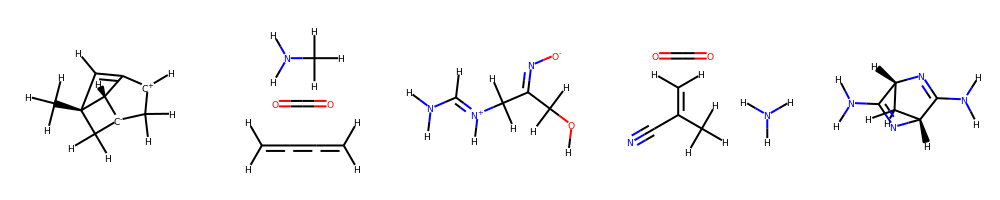

In [393]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [394]:
o_ind_qm9['H'][-1][1]

{'y_ref': array([-3.2544818 , -4.28579333, -4.63137794, -5.50758458, -4.53613809]),
 'y_pred': array([-4.89359754, -5.70626782, -6.05097288, -4.16412882, -5.7806534 ]),
 'ind': array([ 22494, 133853,   6074,  25828,  96678])}

Ref : [ 5.26540324 -0.41361307 -2.04629625 -0.24490248  2.83542645]
Pred : [0.31158147 1.84390868 0.18902856 1.17569778 1.49049678]
Ref (sub) : [ 5.26540324 -0.41361307 -2.04629625 -0.24490248  2.18507432]
Pred (sub) : [ 2.41919407  1.87634104 -0.26665249  1.0838558   1.23032053]


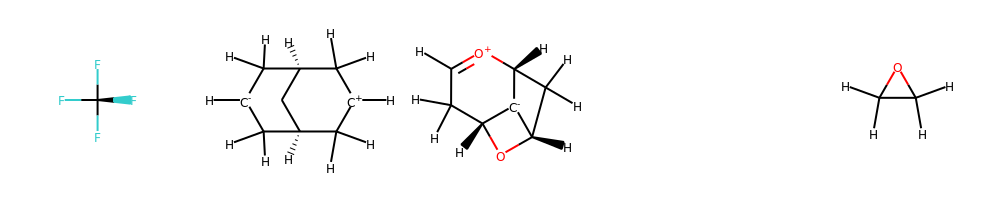

In [397]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm9['L'], 2, labels, Z, C)
Draw.MolsToGridImage(mols, molsPerRow=no)

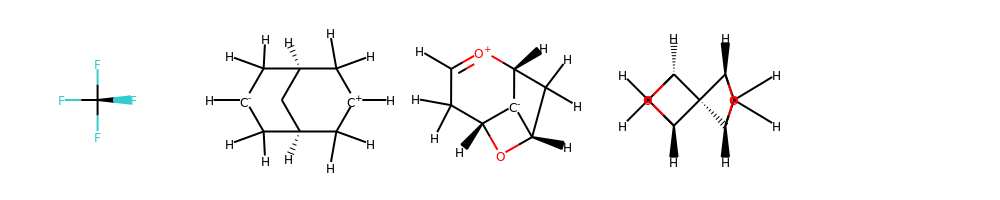

In [398]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [53]:
properties_qm7b = ['G_ZINDO', 'H_ZINDO', 'L_ZINDO', 
                   'G_PBE0', 'H_PBE0', 'L_PBE0',
                   'G_GW', 'H_GW', 'L_GW']
sigmas_qm7b = {-1: 128.0, 0: 512.0, 1: 256.0, 2: 256.0}
res_qm7b = {}
for p in properties_qm7b:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop {p} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm7b[p] = res_p

In [54]:
get_min_max_values(res_qm7b['G_GW'], 0, 1600)

(7.599046351140918, 11.8542)

In [55]:
get_min_max_values(res_qm7b['G_GW'], 1, 1600)

(8.407443675252377, 12.3535)

In [56]:
get_min_max_values(res_qm7b['G_GW'], 2, 800)

(8.708080749952039, 12.40980756048722)

In [57]:
xticks_qm7b = {}
xticks_qm7b['G_GW'] = {0: [8, 10, 12], 
                       1: [8, 10, 12], 
                       2: [8, 10, 12]}

In [58]:
get_min_max_values(res_qm7b['H_GW'], 0, 1600)

(-12.219, -7.0384)

In [59]:
get_min_max_values(res_qm7b['H_GW'], 1, 1600)

(-11.1629, -7.657692704998956)

In [60]:
get_min_max_values(res_qm7b['H_GW'], 2, 800)

(-12.0735, -7.5649)

In [61]:
xticks_qm7b['H_GW'] = {0: [-12, -10, -8], 
                       1: [-12, -10, -8], 
                       2: [-12, -10, -8]}

In [62]:
get_min_max_values(res_qm7b['L_GW'], 0, 1600)

(-1.7011, 1.504)

In [63]:
get_min_max_values(res_qm7b['L_GW'], 1, 1600)

(0.5363790165498399, 1.8377)

In [64]:
get_min_max_values(res_qm7b['L_GW'], 2, 800)

(0.6051, 1.4137)

In [65]:
xticks_qm7b['L_GW'] = {0: [-2, -1, 0, 1, 2], 
                       1: [0.5, 1.0, 1.5, 2.0], 
                       2: [0.5, 1.0, 1.5]}

In [66]:
train_sizes_qm7b = [1600, 1600, 800]
color = 'royalblue'
labels_qm7b = labels_qm9

In [67]:
props_gw = ['G_GW', 'H_GW', 'L_GW']

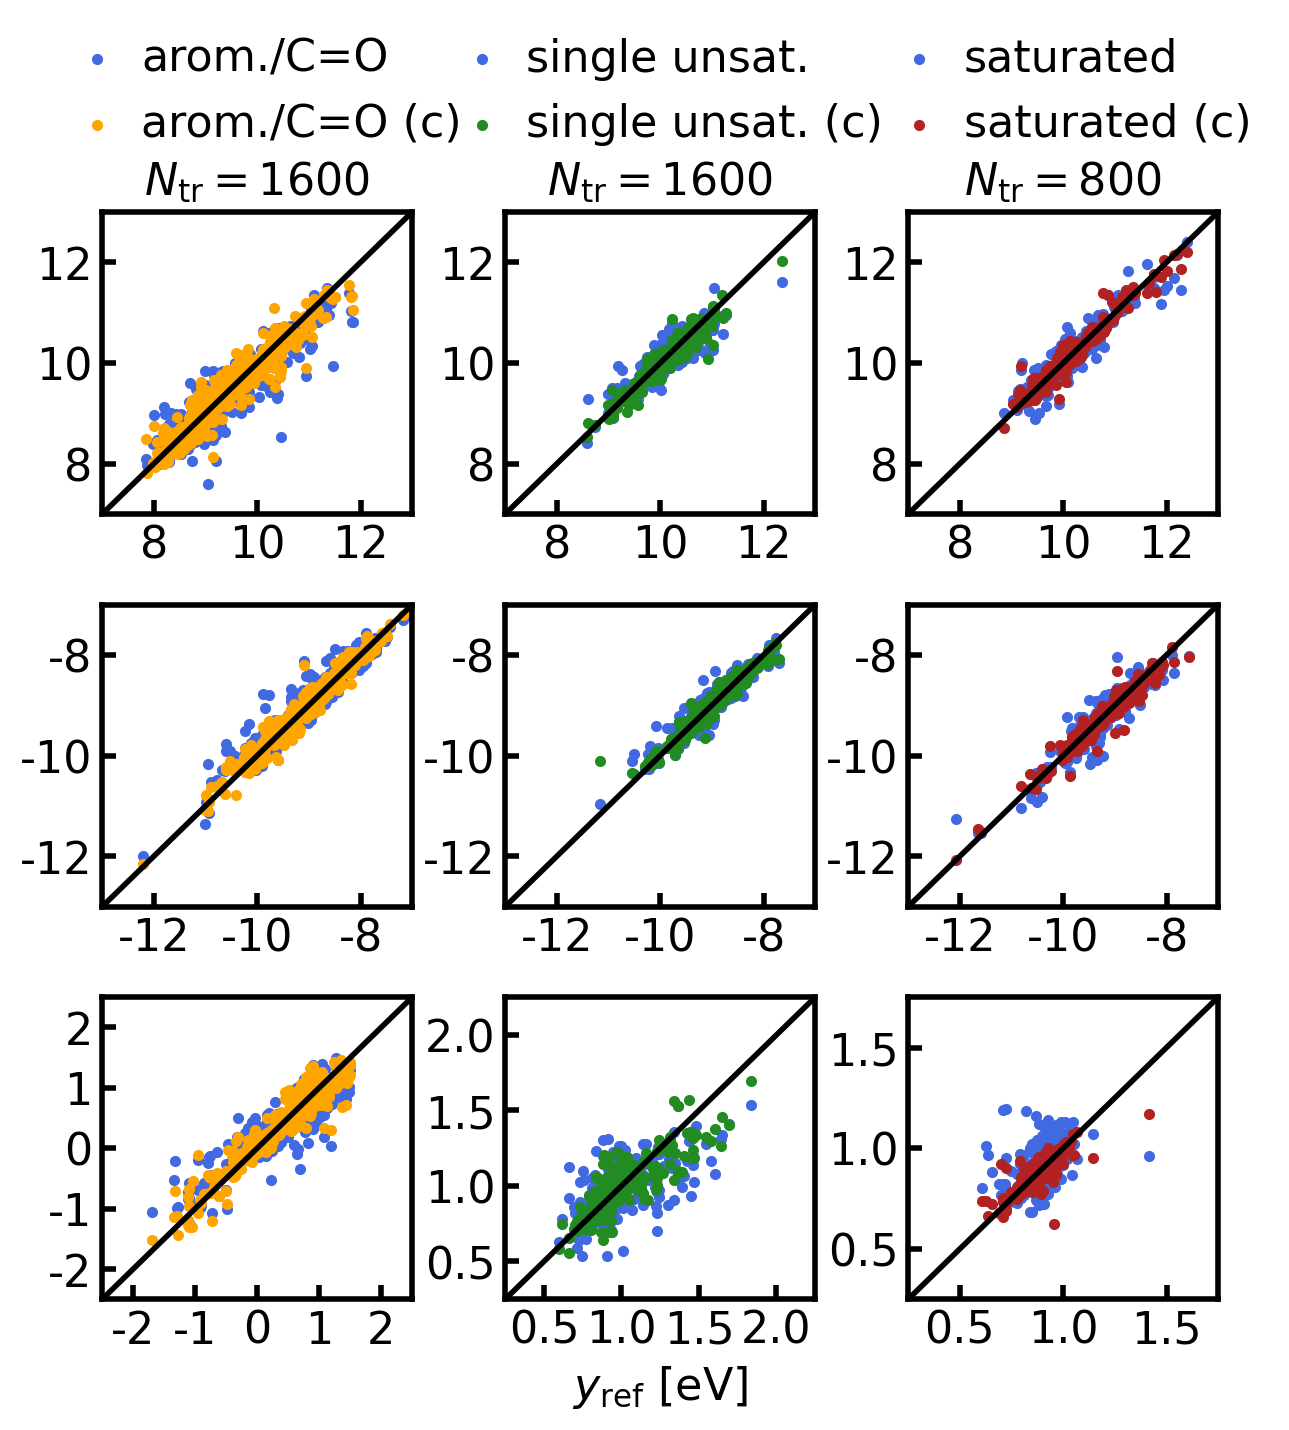

In [68]:
scatter_subplots_array(res_qm7b, props_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, y_labels, 
                       False, 'figures/tmp/scatter_qm7b_gw.png')

In [69]:
res_qm7b['G_GW'][-1][2]['test_ind'][100][:5]

array([5876, 1539,  607, 4619, 5453])

In [70]:
res_qm7b['G_GW'][2]['test_ind'][100][:5]

array([1594,  473,  228, 1348, 1505])

In [71]:
X_qm7b = np.load('data/qm7b/qm7b_data_slatm.npz')
Z_qm7b = X_qm7b['Z']
C_qm7b = X_qm7b['C']
labels_qm7b = X_qm7b['labels']

FileNotFoundError: [Errno 2] No such file or directory: 'data/qm7b/qm7b_data_slatm.npz'

In [72]:
o_ind_qm7b = {}
o_ind_qm7b['G_GW'] = {}
o_ind_qm7b['G_GW'][-1] = {}

In [453]:
o_ind_qm7b['G_GW'][-1][0], o_ind_qm7b['G_GW'][0] = get_outlier_indices(res_qm7b['G_GW'], 0, 1600, no)
o_ind_qm7b['G_GW'][-1][1], o_ind_qm7b['G_GW'][1] = get_outlier_indices(res_qm7b['G_GW'], 1, 1600, no)
o_ind_qm7b['G_GW'][-1][2], o_ind_qm7b['G_GW'][2] = get_outlier_indices(res_qm7b['G_GW'], 2, 800, no)

Ref : [10.463  11.461   9.0426 10.9523  9.2043]
Pred : [8.53682874 9.9493566  7.59904635 9.73383021 8.04364548]
Ref (sub) : [10.9523  9.1371 10.3537 11.8542 10.3176]
Pred (sub) : [ 9.90785575  8.12586529  9.52074122 11.05496266 11.08586541]


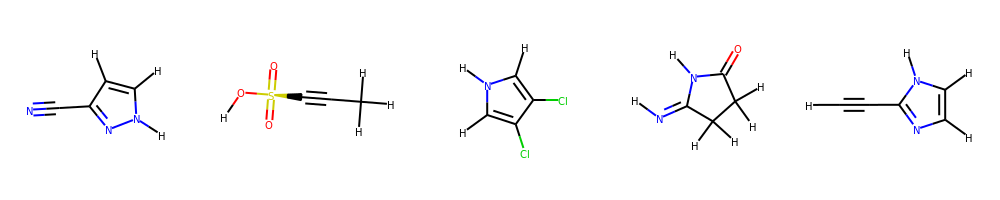

In [455]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['G_GW'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

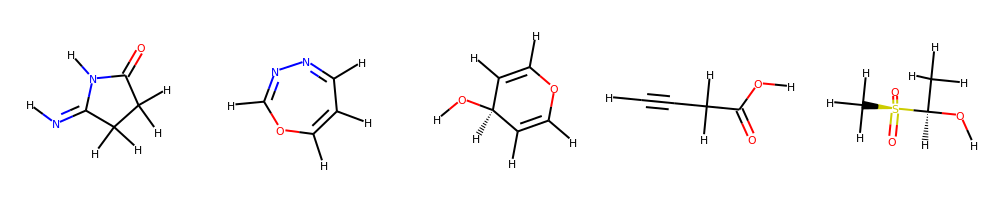

In [456]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [11.028   9.1875 10.925  12.3535 10.8689]
Pred : [10.26052067  9.9490505  10.16866658 11.6013972  10.19116901]
Ref (sub) : [10.925  11.028  10.2279  9.5737  9.0581]
Pred (sub) : [10.07306156 10.3548518  10.87267618  9.15835008  9.46527343]


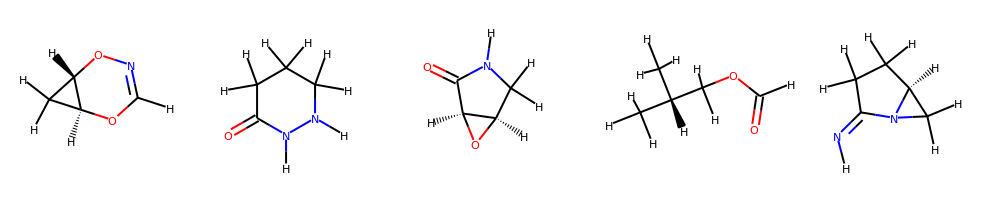

In [457]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['G_GW'], 1, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

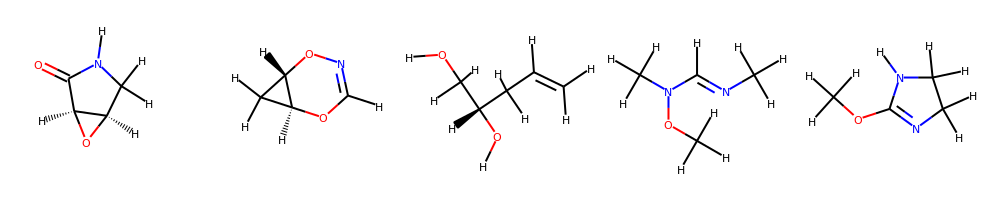

In [458]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [12.2727  9.1962  9.9187 11.9007  9.175 ]
Pred : [11.44178382 10.0037127   9.17843169 11.16347844  9.85054503]
Ref (sub) : [ 9.175   9.9187 10.7659 10.8603 10.0527]
Pred (sub) : [ 9.94888722  9.27877653 11.3952952  11.34370128  9.61873589]


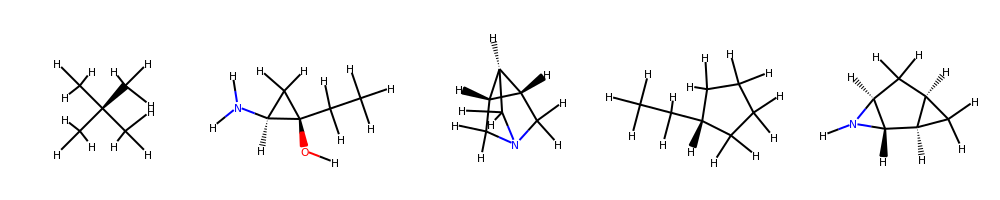

In [460]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['G_GW'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

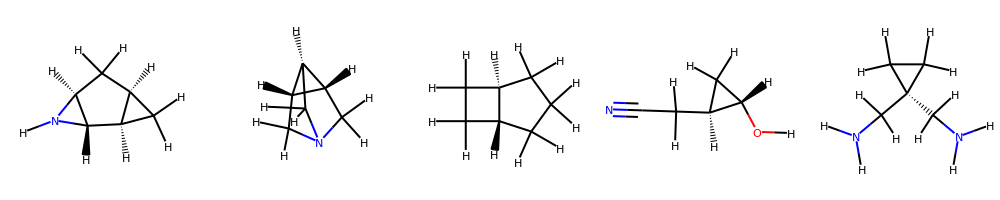

In [461]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [439]:
o_ind_qm7b['H_GW'] = {}
o_ind_qm7b['H_GW'][-1] = {}

o_ind_qm7b['H_GW'][-1][0], o_ind_qm7b['H_GW'][0] = get_outlier_indices(res_qm7b['H_GW'], 0, 1600, no)
o_ind_qm7b['H_GW'][-1][1], o_ind_qm7b['H_GW'][1] = get_outlier_indices(res_qm7b['H_GW'], 1, 1600, no)
o_ind_qm7b['H_GW'][-1][2], o_ind_qm7b['H_GW'][2] = get_outlier_indices(res_qm7b['H_GW'], 2, 800, no)

Ref : [ -9.8801  -9.7767  -9.0881 -10.6133  -9.8462]
Pred : [-8.77964431 -8.80276072 -8.1232387  -9.77921818 -9.04574308]
Ref (sub) : [ -9.0881  -9.5972  -9.7767  -9.8801 -10.5228]
Pred (sub) : [ -8.1928892  -10.08398242  -9.30604784  -9.4265845  -10.10876651]


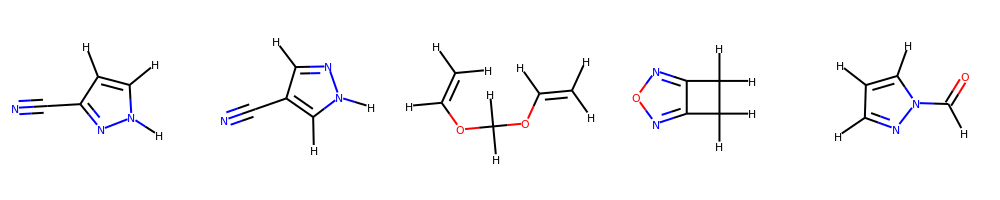

In [463]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['H_GW'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

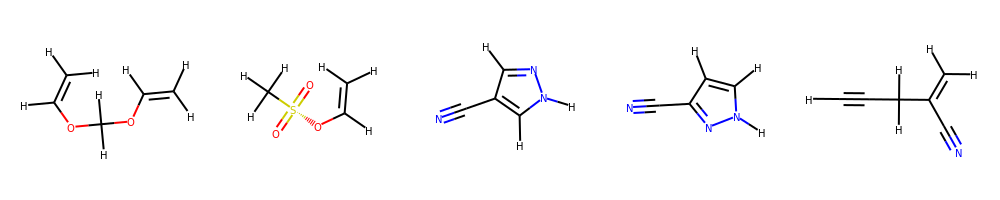

In [464]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [-10.0819  -9.1734  -8.935  -10.5158  -9.0589]
Pred : [-9.40911364 -8.50651513 -8.32047435 -9.97412653 -9.60056701]
Ref (sub) : [-11.1629  -9.135   -9.4029  -9.4016  -7.71  ]
Pred (sub) : [-10.10626862  -9.65498795  -8.95995798  -8.98162312  -8.08289759]


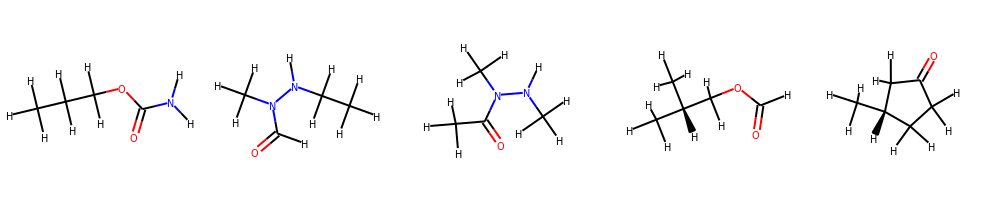

In [465]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['H_GW'], 1, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

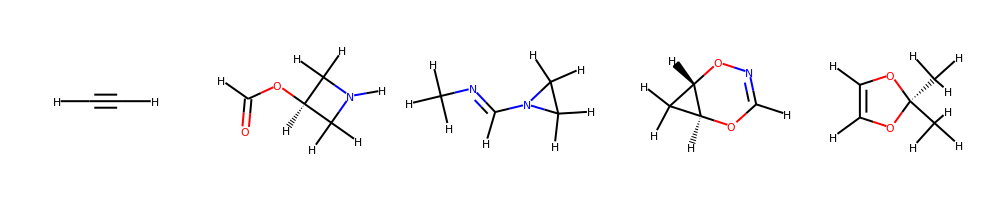

In [466]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [ -8.9506 -12.0735  -9.2366  -9.3458  -9.4721]
Pred : [ -8.04811063 -11.26188044 -10.01356172 -10.0906921  -10.16938878]
Ref (sub) : [-8.8174 -8.9506 -9.3504 -9.0072 -9.8767]
Pred (sub) : [ -9.49605146  -8.31965185  -9.91344676  -9.55897319 -10.40808896]


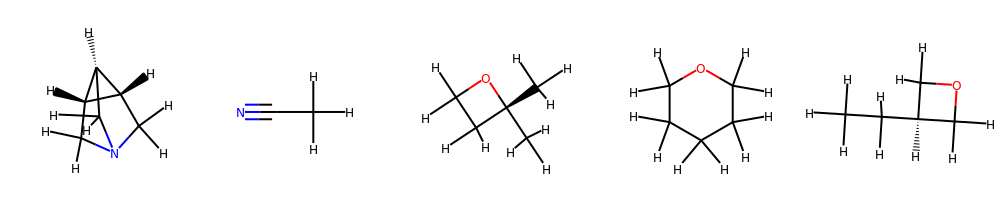

In [467]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['H_GW'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

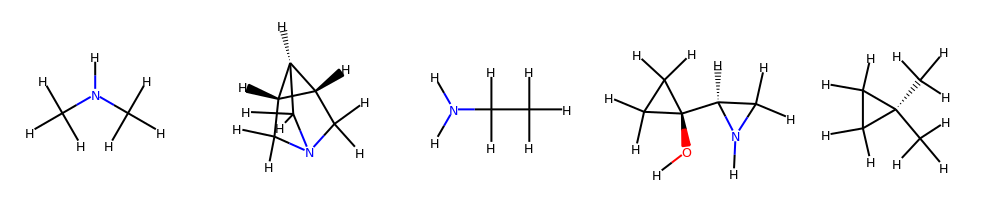

In [468]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [469]:
o_ind_qm7b['L_GW'] = {}
o_ind_qm7b['L_GW'][-1] = {}

o_ind_qm7b['L_GW'][-1][0], o_ind_qm7b['L_GW'][0] = get_outlier_indices(res_qm7b['L_GW'], 0, 1600, no)
o_ind_qm7b['L_GW'][-1][1], o_ind_qm7b['L_GW'][1] = get_outlier_indices(res_qm7b['L_GW'], 1, 1600, no)
o_ind_qm7b['L_GW'][-1][2], o_ind_qm7b['L_GW'][2] = get_outlier_indices(res_qm7b['L_GW'], 2, 800, no)

Ref : [ 1.1869 -1.3329  0.6957  1.0764 -1.3367]
Pred : [ 0.03078798 -0.21869568 -0.34412209  0.18350903 -0.52294716]
Ref (sub) : [ 1.1869 -0.9571  1.0764  1.4393  1.3652]
Pred (sub) : [ 0.29309766 -0.11088398  0.33465639  0.71525988  0.68760034]


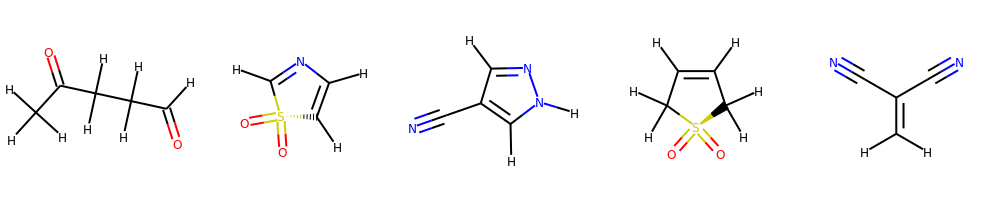

In [471]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['L_GW'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

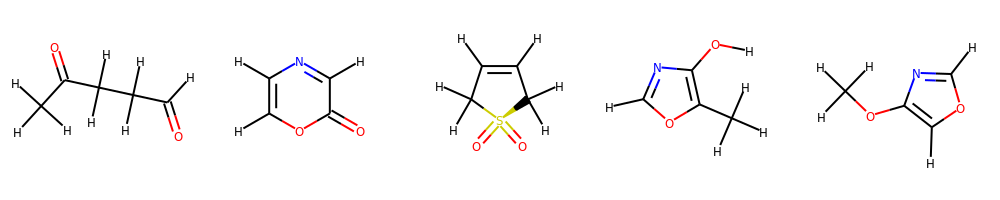

In [472]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

Ref : [0.7082 0.721  1.4137 0.6243 0.8194]
Pred : [1.19074044 1.19653125 0.96348894 1.01229641 1.18604057]
Ref (sub) : [0.954  1.4137 0.7005 1.1423 0.721 ]
Pred (sub) : [0.62119057 1.16935768 0.92117299 0.9500917  0.89930962]


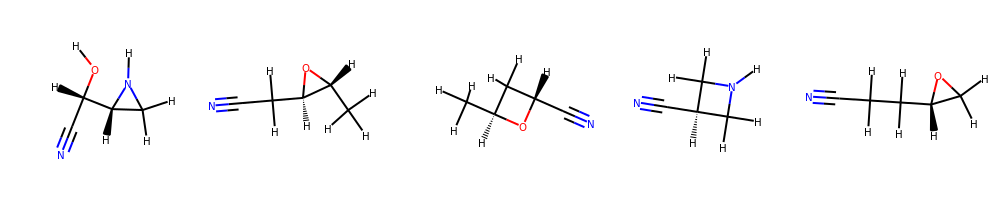

In [475]:
mols, mols_sub = draw_mols_by_indices(o_ind_qm7b['L_GW'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=no)

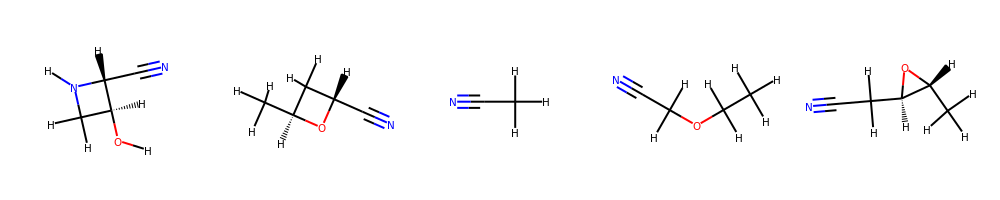

In [476]:
Draw.MolsToGridImage(mols_sub, molsPerRow=no)

In [73]:
property_pairs = [('G_ZINDO', 'G_GW'), ('H_ZINDO', 'H_GW'), ('L_ZINDO', 'L_GW'),
                  ('G_ZINDO', 'G_PBE0'), ('H_ZINDO', 'H_PBE0'), ('L_ZINDO', 'L_PBE0'),
                  ('G_PBE0', 'G_GW'),  ('H_PBE0', 'H_GW'),  ('L_PBE0', 'L_GW')]

res_delta = {}
for p in property_pairs:
    p_base = p[0]
    p_target = p[1]
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop delta {p_base} {p_target} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_scatter_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_delta[f'({p_base},{p_target})'] = res_p

In [74]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 0, 1600)

(7.319616894368081, 12.875351357186583)

In [75]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 1, 1600)

(8.034992100974293, 12.3244)

In [76]:
get_min_max_values(res_delta['(G_ZINDO,G_GW)'], 2, 800)

(8.832799999999999, 12.396321640920538)

In [77]:
xticks_delta = {}
xticks_delta['(G_ZINDO,G_GW)'] = {0: [8, 10, 12], 
                                  1: [8, 10, 12], 
                                  2: [8, 10, 12]}

In [78]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 0, 1600)

(-11.1883, -7.067474021503752)

In [79]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 1, 1600)

(-10.584321120626822, -7.667707262906282)

In [80]:
get_min_max_values(res_delta['(H_ZINDO,H_GW)'], 2, 800)

(-11.9831, -7.707056648783788)

In [81]:
xticks_delta['(H_ZINDO,H_GW)'] = {0: [-11, -9, -7], 
                                  1: [-10, -9, -8, -7], 
                                  2: [-12, -10, -8]}

In [82]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 0, 1600)

(-1.3864, 1.8199688175986415)

In [83]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 1, 1600)

(0.364848193007242, 1.8337)

In [84]:
get_min_max_values(res_delta['(L_ZINDO,L_GW)'], 2, 800)

(0.4846411881534358, 1.9527117524093356)

In [85]:
xticks_delta['(L_ZINDO,L_GW)'] = {0: [-1, 0, 1, 2], 
                                  1: [0.5, 1.0, 1.5, 2.0], 
                                  2: [0.5, 1.0, 1.5, 2.0]}

In [86]:
props_zindo_gw = ['(G_ZINDO,G_GW)', '(H_ZINDO,H_GW)', '(L_ZINDO,L_GW)']

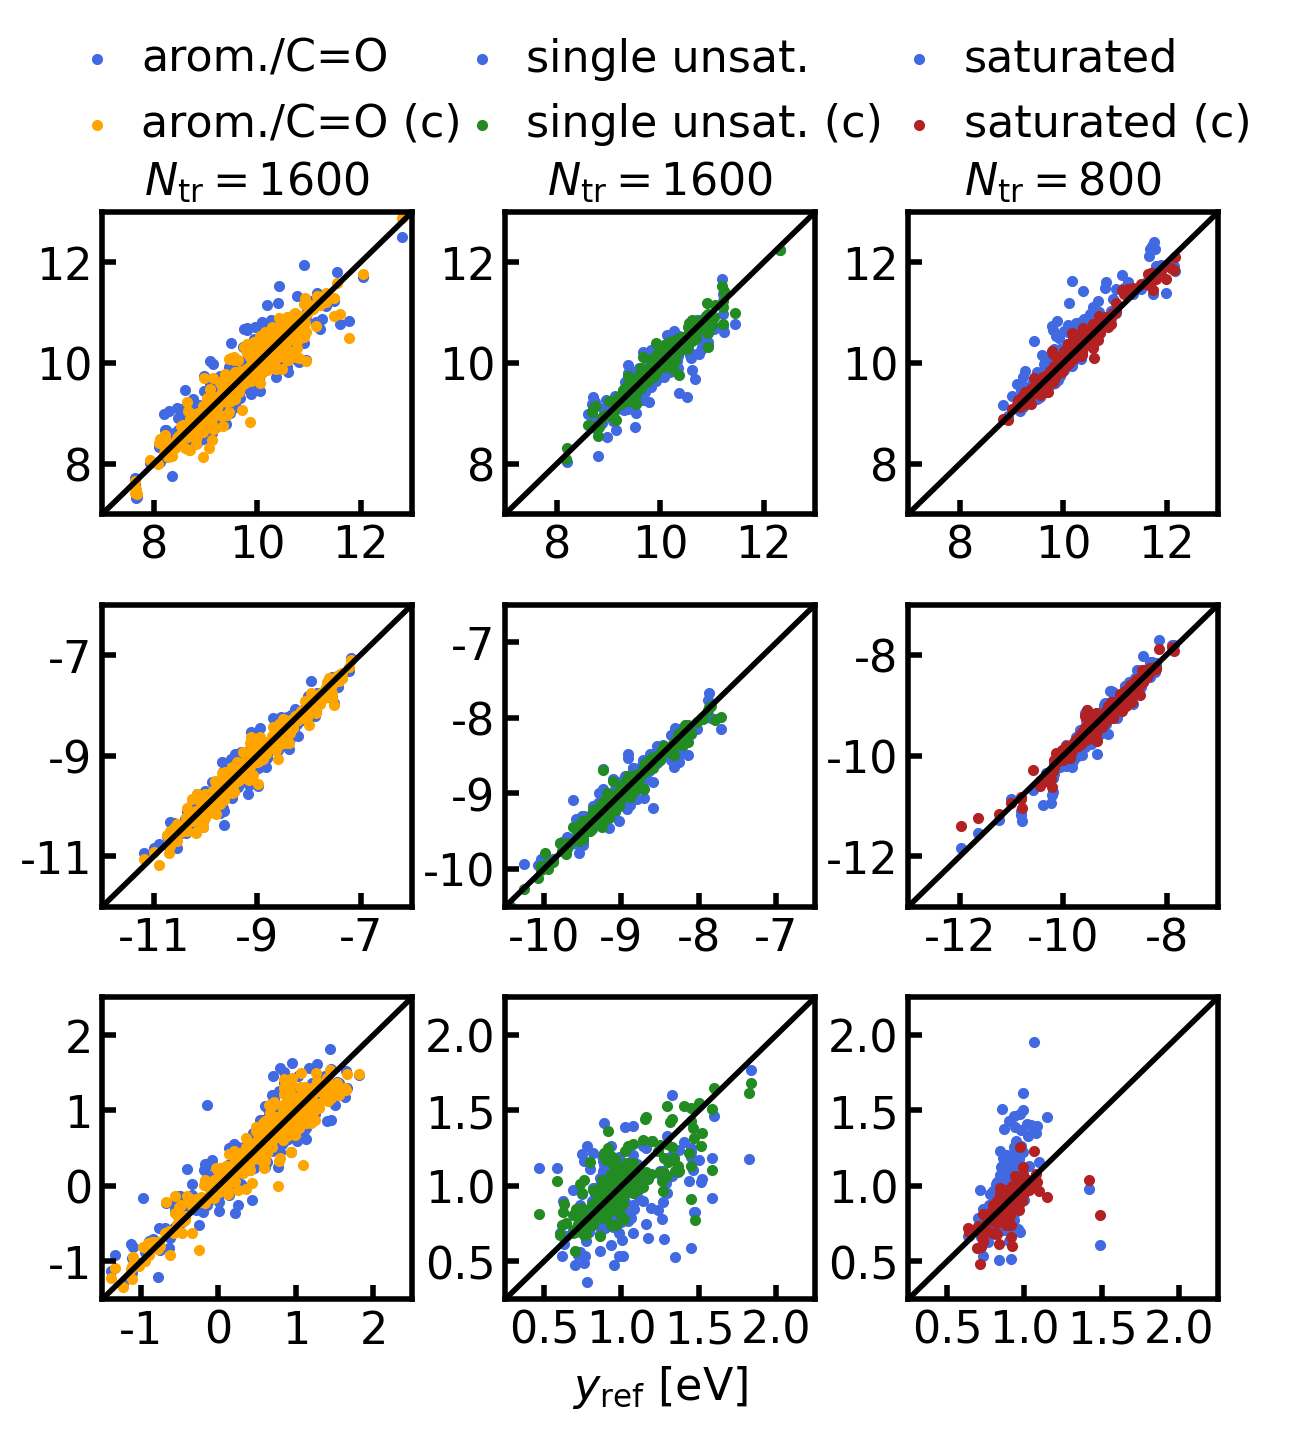

In [87]:
scatter_subplots_array(res_delta, props_zindo_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, y_labels, 
                       False, 'figures/tmp/scatter_qm7b_delta_zindo_gw.png')

In [478]:
o_ind_delta = {}
o_ind_delta['(G_ZINDO,G_GW)'] = {}
o_ind_delta['(G_ZINDO,G_GW)'][-1] = {}

In [480]:
o_ind_delta['(G_ZINDO,G_GW)'][-1][0], o_ind_delta['(G_ZINDO,G_GW)'][0] = get_outlier_indices(res_delta['(G_ZINDO,G_GW)'], 0, 1600, no)
o_ind_delta['(G_ZINDO,G_GW)'][-1][1], o_ind_delta['(G_ZINDO,G_GW)'][1] = get_outlier_indices(res_delta['(G_ZINDO,G_GW)'], 1, 1600, no)
o_ind_delta['(G_ZINDO,G_GW)'][-1][2], o_ind_delta['(G_ZINDO,G_GW)'][2] = get_outlier_indices(res_delta['(G_ZINDO,G_GW)'], 2, 800, no)

Ref : [10.4167 10.9015 10.1981  9.0776 11.775 ]
Pred : [11.52078789 11.94054442 11.1567727  10.03039554 10.82787706]
Ref (sub) : [11.775   9.8603 10.9523  8.9515  9.0655]
Pred (sub) : [10.49885554  8.82985562 10.04540146  8.13983354  8.30899666]


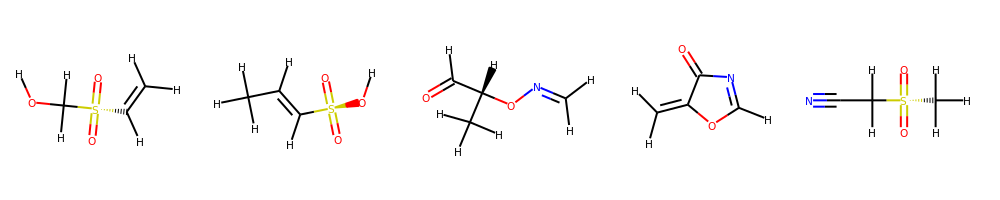

In [481]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(G_ZINDO,G_GW)'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

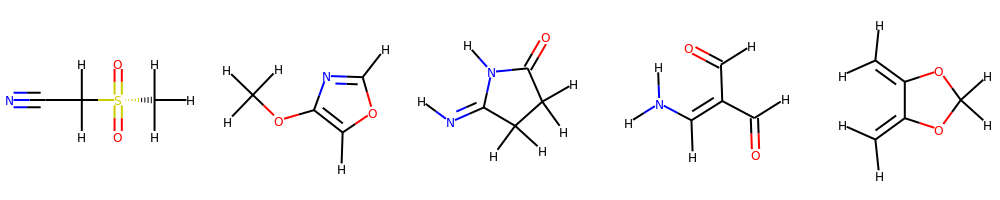

In [482]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [10.5146 10.6793 10.369   9.5079 10.6057]
Pred : [9.32253965 9.68216874 9.40400054 8.73050269 9.85694106]
Ref (sub) : [10.369  10.925   9.9276 11.4474  9.6704]
Pred (sub) : [ 9.75323933 10.30944537 10.38814614 10.99290297 10.11070226]


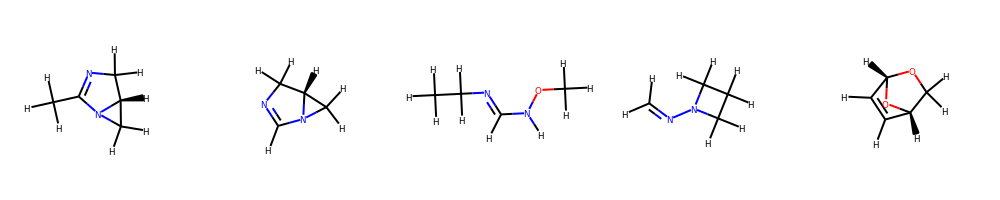

In [483]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(G_ZINDO,G_GW)'], 1, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

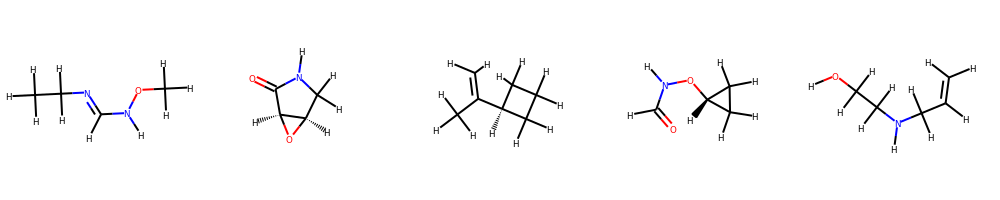

In [484]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [10.1667 10.1031 10.3923  9.4262  9.7807]
Pred : [11.632569   11.18540399 11.43646361 10.44562429 10.73653568]
Ref (sub) : [10.59    9.7807 10.1667  9.8108 11.9964]
Pred (sub) : [10.09443485 10.23866387 10.58620603 10.1734999  11.67300213]


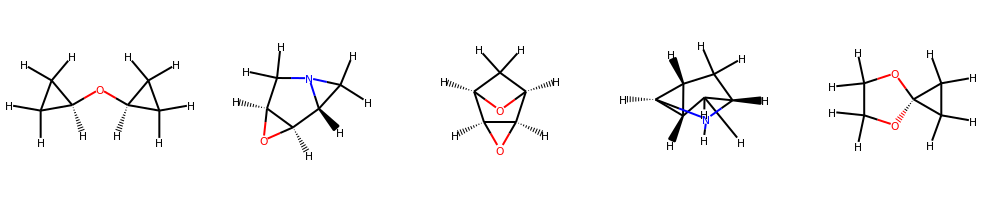

In [485]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(G_ZINDO,G_GW)'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

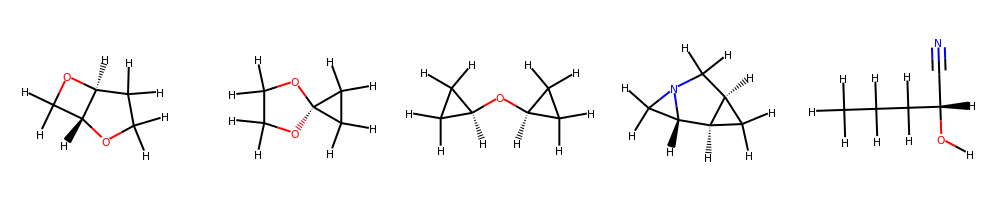

In [486]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

In [487]:
o_ind_delta['(H_ZINDO,H_GW)'] = {}
o_ind_delta['(H_ZINDO,H_GW)'][-1] = {}

o_ind_delta['(H_ZINDO,H_GW)'][-1][0], o_ind_delta['(H_ZINDO,H_GW)'][0] = get_outlier_indices(res_delta['(H_ZINDO,H_GW)'], 0, 1600, no)
o_ind_delta['(H_ZINDO,H_GW)'][-1][1], o_ind_delta['(H_ZINDO,H_GW)'][1] = get_outlier_indices(res_delta['(H_ZINDO,H_GW)'], 1, 1600, no)
o_ind_delta['(H_ZINDO,H_GW)'][-1][2], o_ind_delta['(H_ZINDO,H_GW)'][2] = get_outlier_indices(res_delta['(H_ZINDO,H_GW)'], 2, 800, no)

Ref : [-9.6443 -8.9768 -9.1249 -9.1773 -9.6735]
Pred : [-10.37149816  -9.59784861  -8.53036245  -9.75642585  -9.13359632]
Ref (sub) : [-8.9768 -9.1249 -7.5094 -8.593  -9.1492]
Pred (sub) : [-9.56897285 -8.62756922 -7.99617626 -9.07322754 -8.74316289]


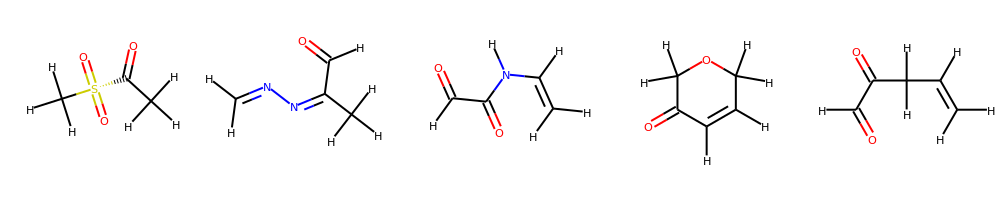

In [488]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(H_ZINDO,H_GW)'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

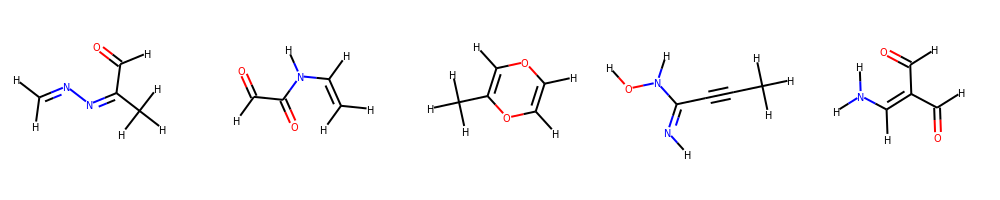

In [489]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [-8.5972 -9.241  -9.6226 -8.9217 -7.71  ]
Pred : [-9.19718903 -8.68131223 -9.09170963 -8.47697258 -8.14816822]
Ref (sub) : [-9.241  -7.71   -9.1129 -8.7034 -7.7974]
Pred (sub) : [-8.68466689 -7.98914871 -8.83551907 -8.94201426 -8.03462116]


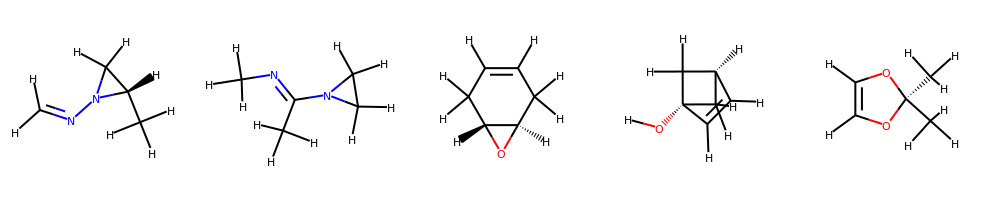

In [490]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(H_ZINDO,H_GW)'], 1, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

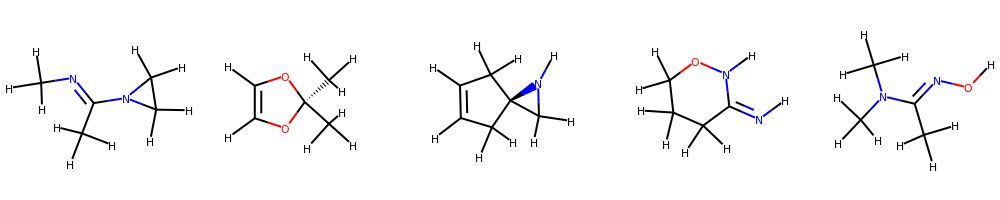

In [491]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [-10.2335  -9.3479 -10.3829 -10.2162 -10.2056]
Pred : [-10.94550896  -9.96187506 -10.98359643 -10.77687541 -10.72858567]
Ref (sub) : [-11.9831  -9.5357 -11.6583 -10.2162  -9.3479]
Pred (sub) : [-11.40553     -9.09391285 -11.23073199 -10.62849683  -9.7149308 ]


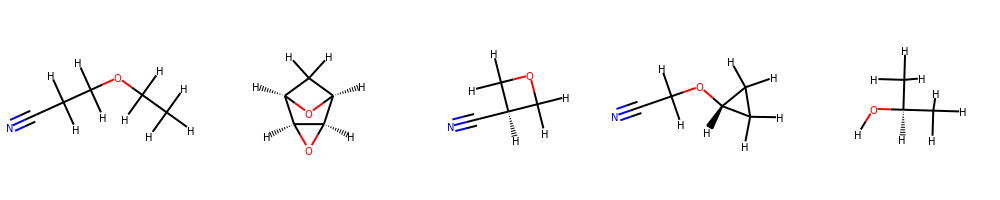

In [492]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(H_ZINDO,H_GW)'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

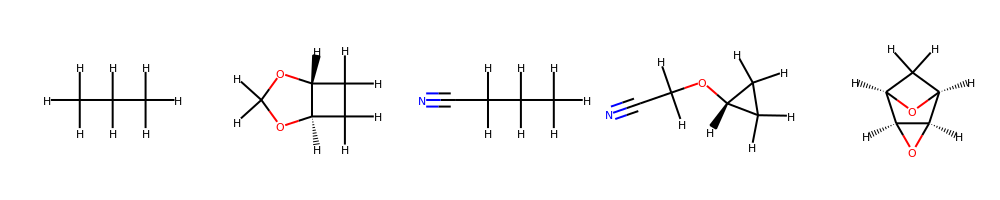

In [493]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

In [495]:
o_ind_delta['(L_ZINDO,L_GW)'] = {}
o_ind_delta['(L_ZINDO,L_GW)'][-1] = {}

o_ind_delta['(L_ZINDO,L_GW)'][-1][0], o_ind_delta['(L_ZINDO,L_GW)'][0] = get_outlier_indices(res_delta['(L_ZINDO,L_GW)'], 0, 1600, no)
o_ind_delta['(L_ZINDO,L_GW)'][-1][1], o_ind_delta['(L_ZINDO,L_GW)'][1] = get_outlier_indices(res_delta['(L_ZINDO,L_GW)'], 1, 1600, no)
o_ind_delta['(L_ZINDO,L_GW)'][-1][2], o_ind_delta['(L_ZINDO,L_GW)'][2] = get_outlier_indices(res_delta['(L_ZINDO,L_GW)'], 2, 800, no)

Ref : [-0.1433 -0.974   0.7006  0.7999  0.9452]
Pred : [ 1.07451019 -0.15408137  1.46242903  1.56125154  1.63143438]
Ref (sub) : [ 1.0897  0.7646 -0.2495  0.8472  0.9452]
Pred (sub) : [ 2.80292471e-01 -3.85069589e-04 -8.45498825e-01  1.41538355e+00
  1.42574200e+00]


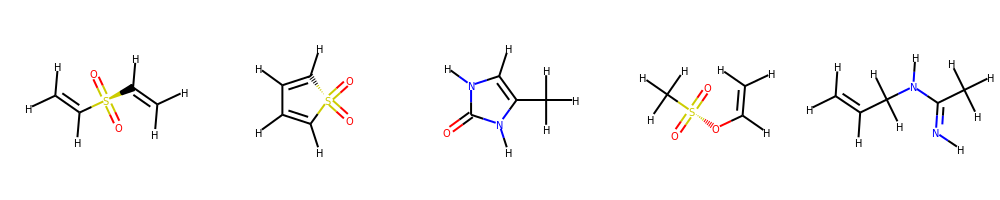

In [496]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(L_ZINDO,L_GW)'], 0, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

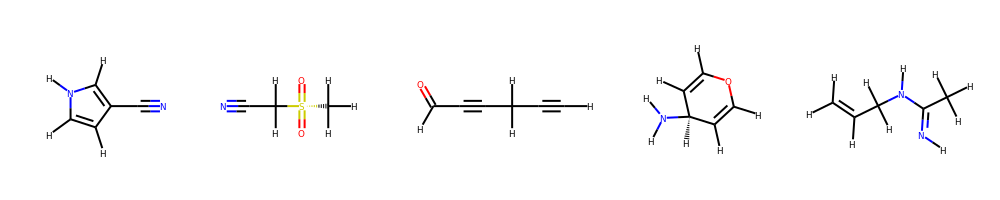

In [497]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [1.4506 1.3439 1.5872 0.4711 1.4754]
Pred : [0.59077587 0.53006642 0.9208265  1.1213425  0.82793728]
Ref (sub) : [1.4754 1.4506 1.5863 0.5817 0.9134]
Pred (sub) : [0.77584891 0.91022404 1.10866213 1.03388967 1.36077506]


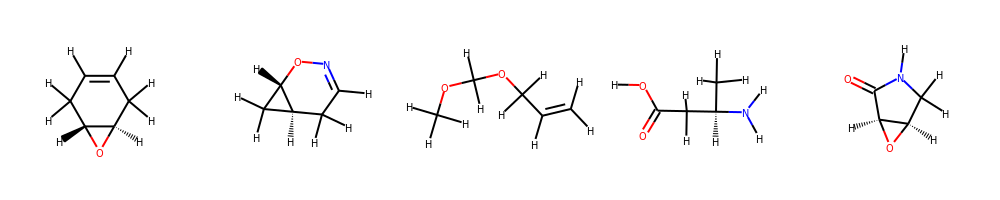

In [498]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(L_ZINDO,L_GW)'], 1, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

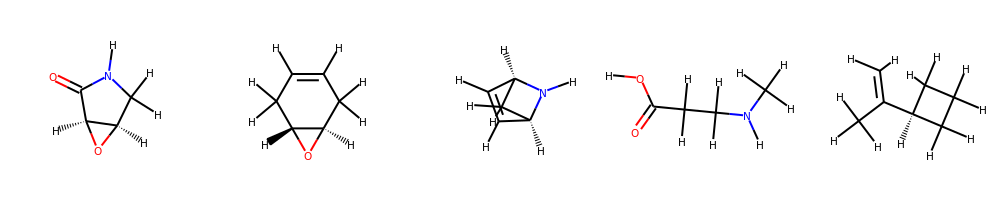

In [499]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

Ref : [1.0623 1.4893 0.8538 0.9916 0.9341]
Pred : [1.95271175 0.61081229 1.51008773 1.61284205 1.463827  ]
Ref (sub) : [1.4893 1.4137 0.9178 0.9722 0.9148]
Pred (sub) : [0.8045173  1.0376483  0.6041299  1.26059519 0.66427803]


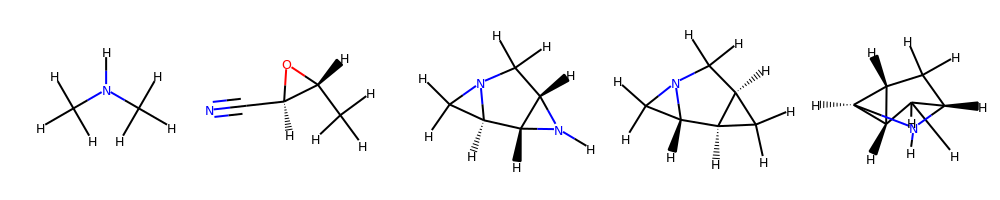

In [500]:
mols, mols_sub = draw_mols_by_indices(o_ind_delta['(L_ZINDO,L_GW)'], 2, labels_qm7b, Z_qm7b, C_qm7b)
Draw.MolsToGridImage(mols, molsPerRow=5)

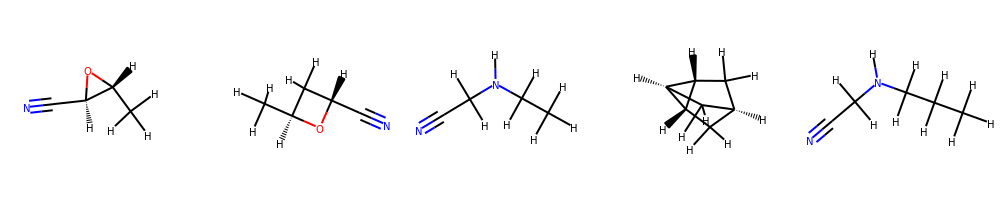

In [501]:
Draw.MolsToGridImage(mols_sub, molsPerRow=5)

In [88]:
get_min_max_values(res_qm7b['G_ZINDO'], 0, 1600)

(7.438999999999999, 12.91974027725982)

In [89]:
get_min_max_values(res_qm7b['G_ZINDO'], 1, 1600)

(8.578000000000001, 12.722930281909973)

In [90]:
get_min_max_values(res_qm7b['G_ZINDO'], 2, 800)

(10.219, 15.341298039077472)

In [91]:
xticks_qm7b['G_ZINDO'] = {0: [8, 10, 12], 
                          1: [8, 10, 12], 
                          2: [11, 13, 15]}

In [92]:
get_min_max_values(res_qm7b['H_ZINDO'], 0, 1600)

(-11.783196677967188, -7.327055913360528)

In [93]:
get_min_max_values(res_qm7b['H_ZINDO'], 1, 1600)

(-11.783, -8.344)

In [94]:
get_min_max_values(res_qm7b['H_ZINDO'], 2, 800)

(-12.105, -8.237)

In [95]:
xticks_qm7b['H_ZINDO'] = {0: [-11, -9, -7], 
                          1: [-12, -10, -8], 
                          2: [-12, -10, -8]}

In [96]:
get_min_max_values(res_qm7b['L_ZINDO'], 0, 1600)

(-2.091, 2.12)

In [97]:
get_min_max_values(res_qm7b['L_ZINDO'], 1, 1600)

(-0.37, 2.4848728960682482)

In [98]:
get_min_max_values(res_qm7b['L_ZINDO'], 2, 800)

(1.1714255391334563, 3.655)

In [99]:
xticks_qm7b['L_ZINDO'] = {0: [-2, -1, 0, 1, 2], 
                          1: [0, 1, 2], 
                          2: [1, 2, 3, 4]}

In [100]:
props_zindo = ['G_ZINDO', 'H_ZINDO', 'L_ZINDO']

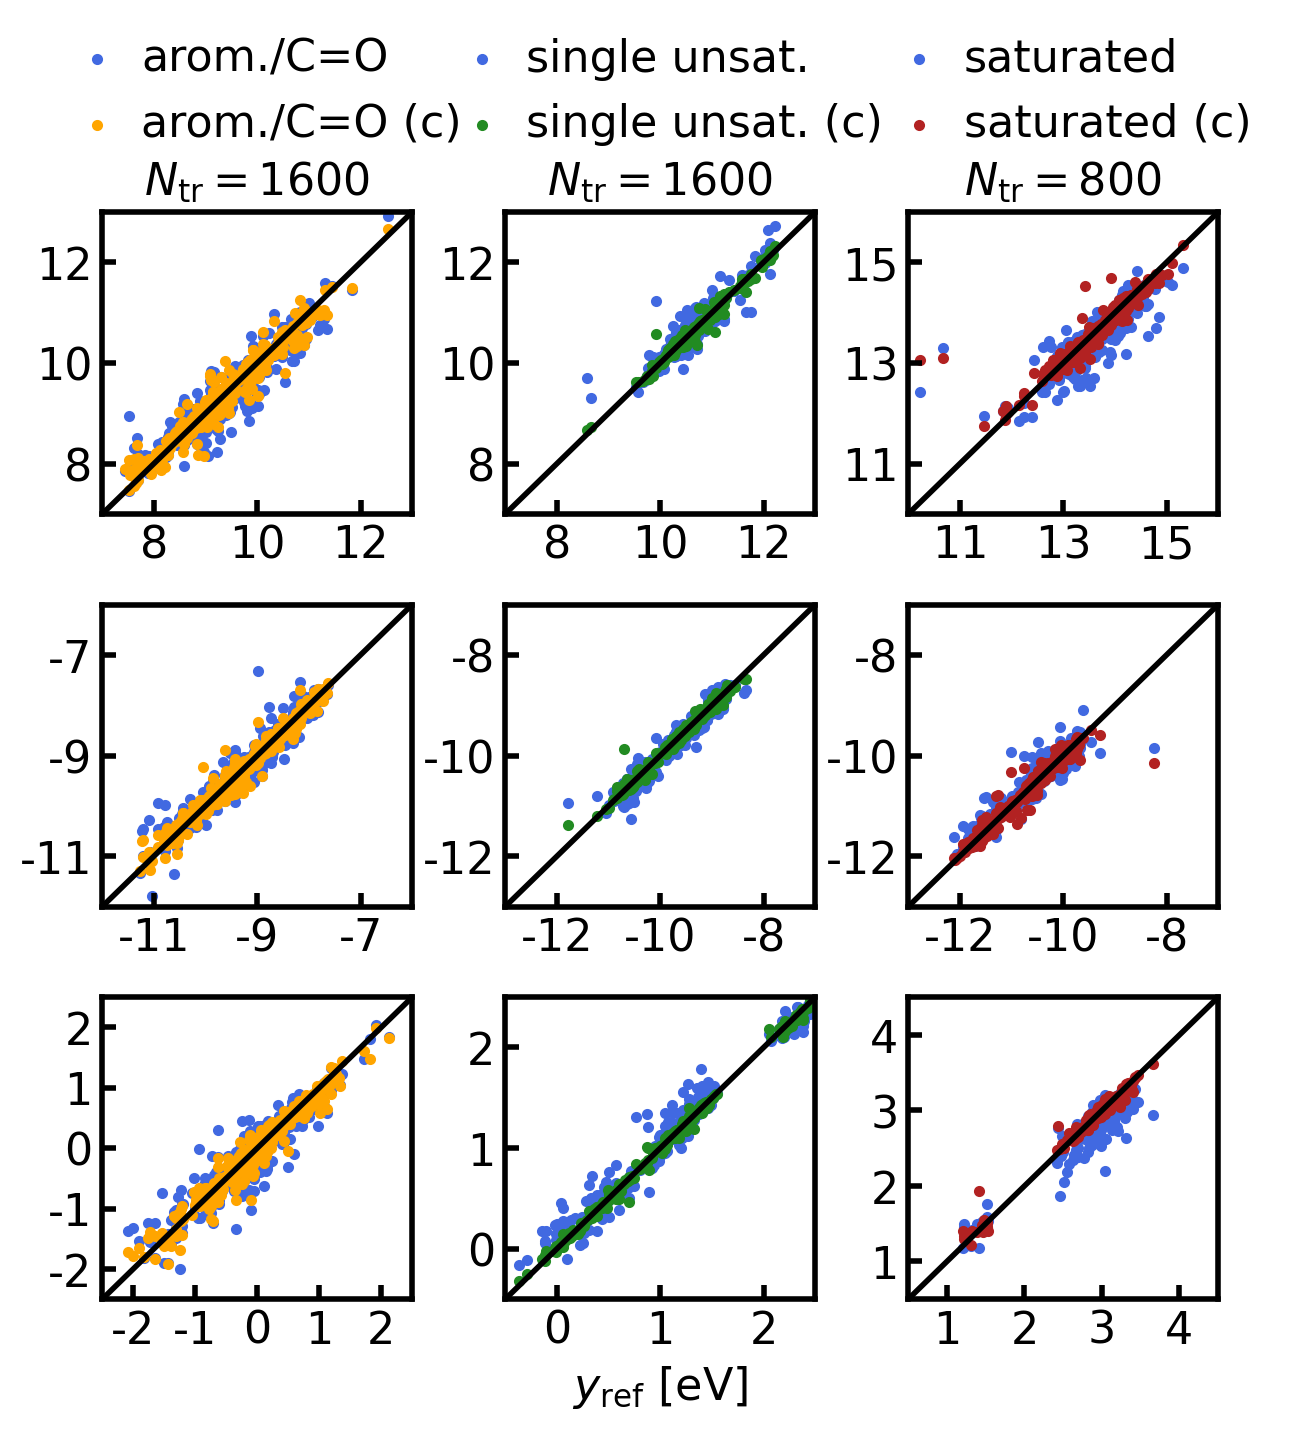

In [101]:
scatter_subplots_array(res_qm7b, props_zindo, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, y_labels, 
                       False, 'figures/tmp/scatter_qm7b_zindo.png')

In [143]:
get_min_max_values(res_qm7b['G_PBE0'], 0, 1600)

(4.1669, 9.0489)

In [144]:
get_min_max_values(res_qm7b['G_PBE0'], 1, 1600)

(5.632212563465934, 8.062100000000001)

In [145]:
get_min_max_values(res_qm7b['G_PBE0'], 2, 800)

(5.5393, 9.232)

In [146]:
xticks_qm7b['G_PBE0'] = {0: [5, 7, 9], 
                         1: [6, 7, 8], 
                         2: [6, 7, 8, 9]}

In [147]:
get_min_max_values(res_qm7b['H_PBE0'], 0, 1600)

(-8.939167316841987, -5.133)

In [148]:
get_min_max_values(res_qm7b['H_PBE0'], 1, 1600)

(-8.309, -5.795157062827139)

In [149]:
get_min_max_values(res_qm7b['H_PBE0'], 2, 800)

(-9.1313, -5.8553)

In [157]:
xticks_qm7b['H_PBE0'] = {0: [-8, -7, -6, -5], 
                         1: [-8, -7, -6, -5], 
                         2: [-9, -8, -7, -6]}

In [151]:
get_min_max_values(res_qm7b['L_PBE0'], 0, 1600)

(-3.5773, 0.2087781284104615)

In [152]:
get_min_max_values(res_qm7b['L_PBE0'], 1, 1600)

(-1.3476122681110434, 0.18732833408447291)

In [153]:
get_min_max_values(res_qm7b['L_PBE0'], 2, 800)

(-0.7925254232115353, 0.20411886428434567)

In [154]:
xticks_qm7b['L_PBE0'] = {0: [-4, -3, -2, -1, 0], 
                         1: [-1, 0, 1], 
                         2: [-1.0, -0.5, 0.]}

In [155]:
props_pbe0 = ['G_PBE0', 'H_PBE0', 'L_PBE0']

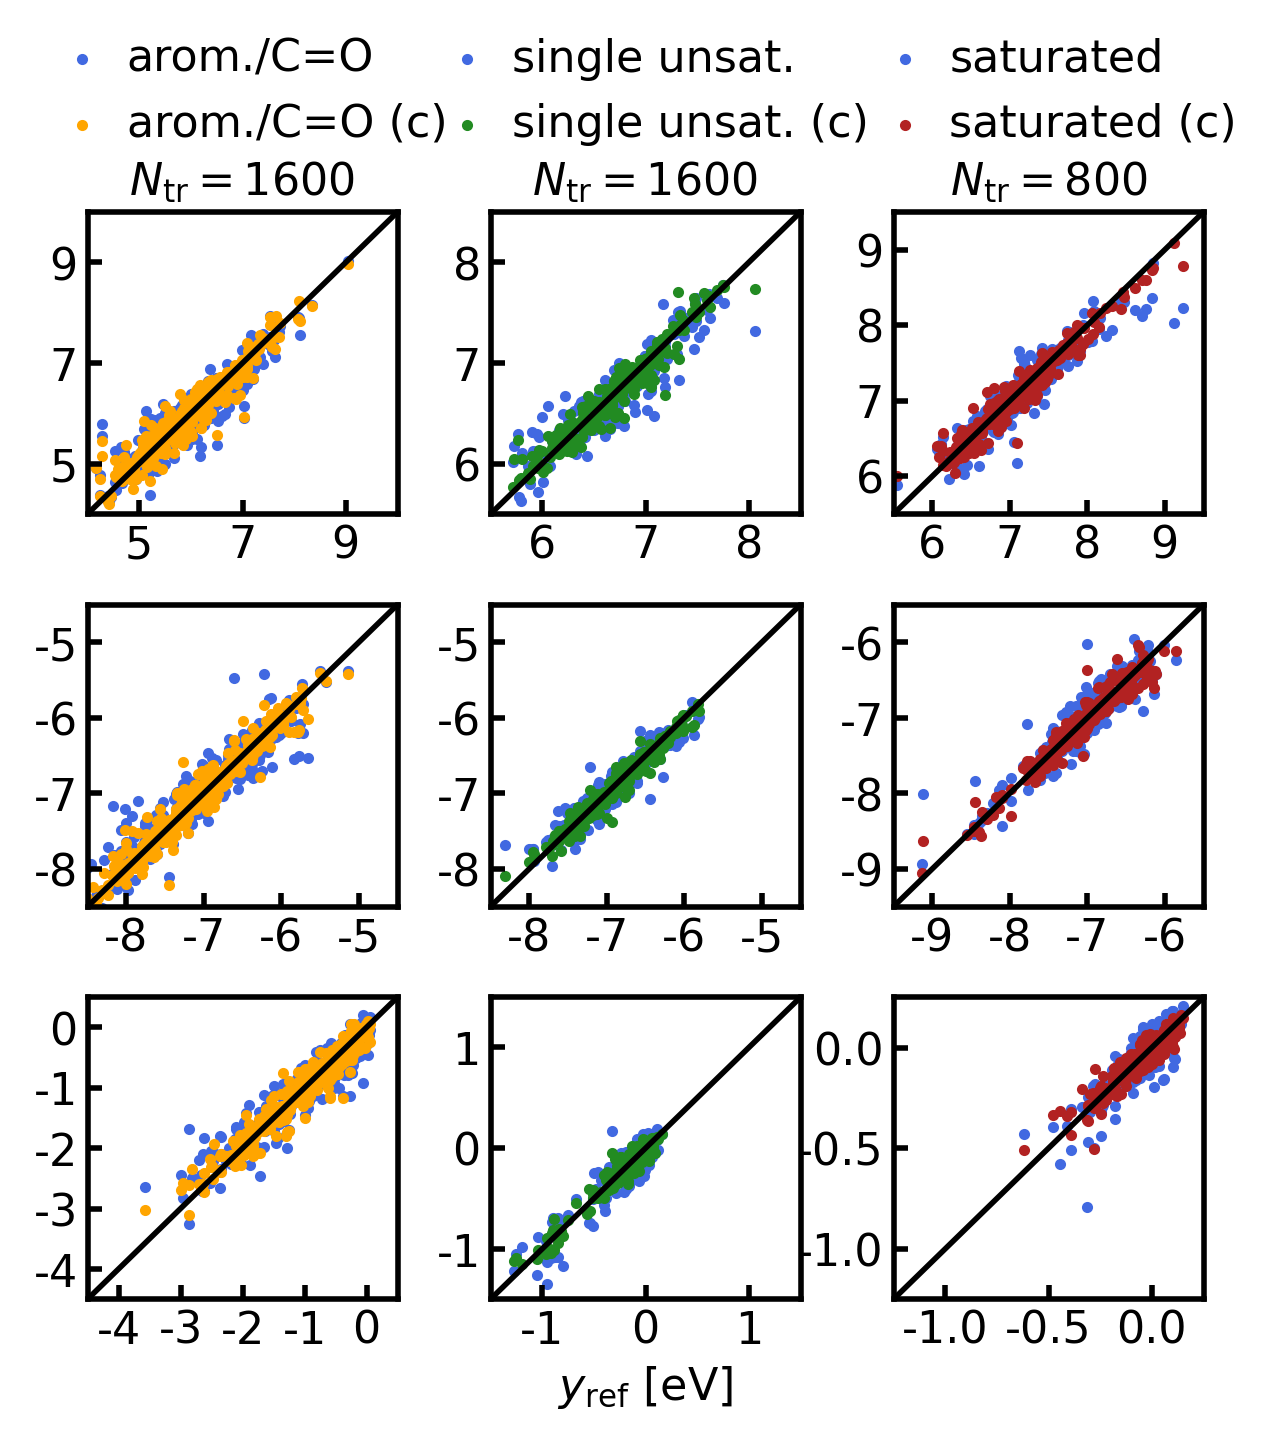

In [198]:
scatter_subplots_array(res_qm7b, props_pbe0, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_qm7b, y_labels, 
                       True, 'figures/tmp/scatter_qm7b_pbe0.png')

In [159]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 0, 1600)

(7.772279602223986, 11.863937841492383)

In [160]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 1, 1600)

(8.1731, 12.3939)

In [161]:
get_min_max_values(res_delta['(G_PBE0,G_GW)'], 2, 800)

(8.814834847463507, 12.44895880140298)

In [162]:
xticks_delta['(G_ZINDO,G_GW)']

{0: [8, 10, 12], 1: [8, 10, 12], 2: [8, 10, 12]}

In [163]:
xticks_delta['(G_PBE0,G_GW)'] = xticks_delta['(G_ZINDO,G_GW)']

In [164]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 0, 1600)

(-11.1883, -7.0873)

In [165]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 1, 1600)

(-10.1615, -7.561407663587039)

In [166]:
get_min_max_values(res_delta['(H_PBE0,H_GW)'], 2, 800)

(-11.6583, -7.930678044254433)

In [167]:
xticks_delta['(H_ZINDO,H_GW)']

{0: [-11, -9, -7], 1: [-10, -9, -8, -7], 2: [-12, -10, -8]}

In [168]:
xticks_delta['(H_PBE0,H_GW)'] = xticks_delta['(H_ZINDO,H_GW)']

In [169]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 0, 1600)

(-1.6307054956168465, 1.6323)

In [170]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 1, 1600)

(0.4552692405334552, 1.9068)

In [171]:
get_min_max_values(res_delta['(L_PBE0,L_GW)'], 2, 800)

(0.6155295882535191, 1.4893)

In [172]:
xticks_delta['(L_ZINDO,L_GW)']

{0: [-1, 0, 1, 2], 1: [0.5, 1.0, 1.5, 2.0], 2: [0.5, 1.0, 1.5, 2.0]}

In [173]:
xticks_delta['(L_PBE0,L_GW)'] = xticks_delta['(L_ZINDO,L_GW)']

In [174]:
props_pbe0_gw = ['(G_PBE0,G_GW)', '(H_PBE0,H_GW)', '(L_PBE0,L_GW)']

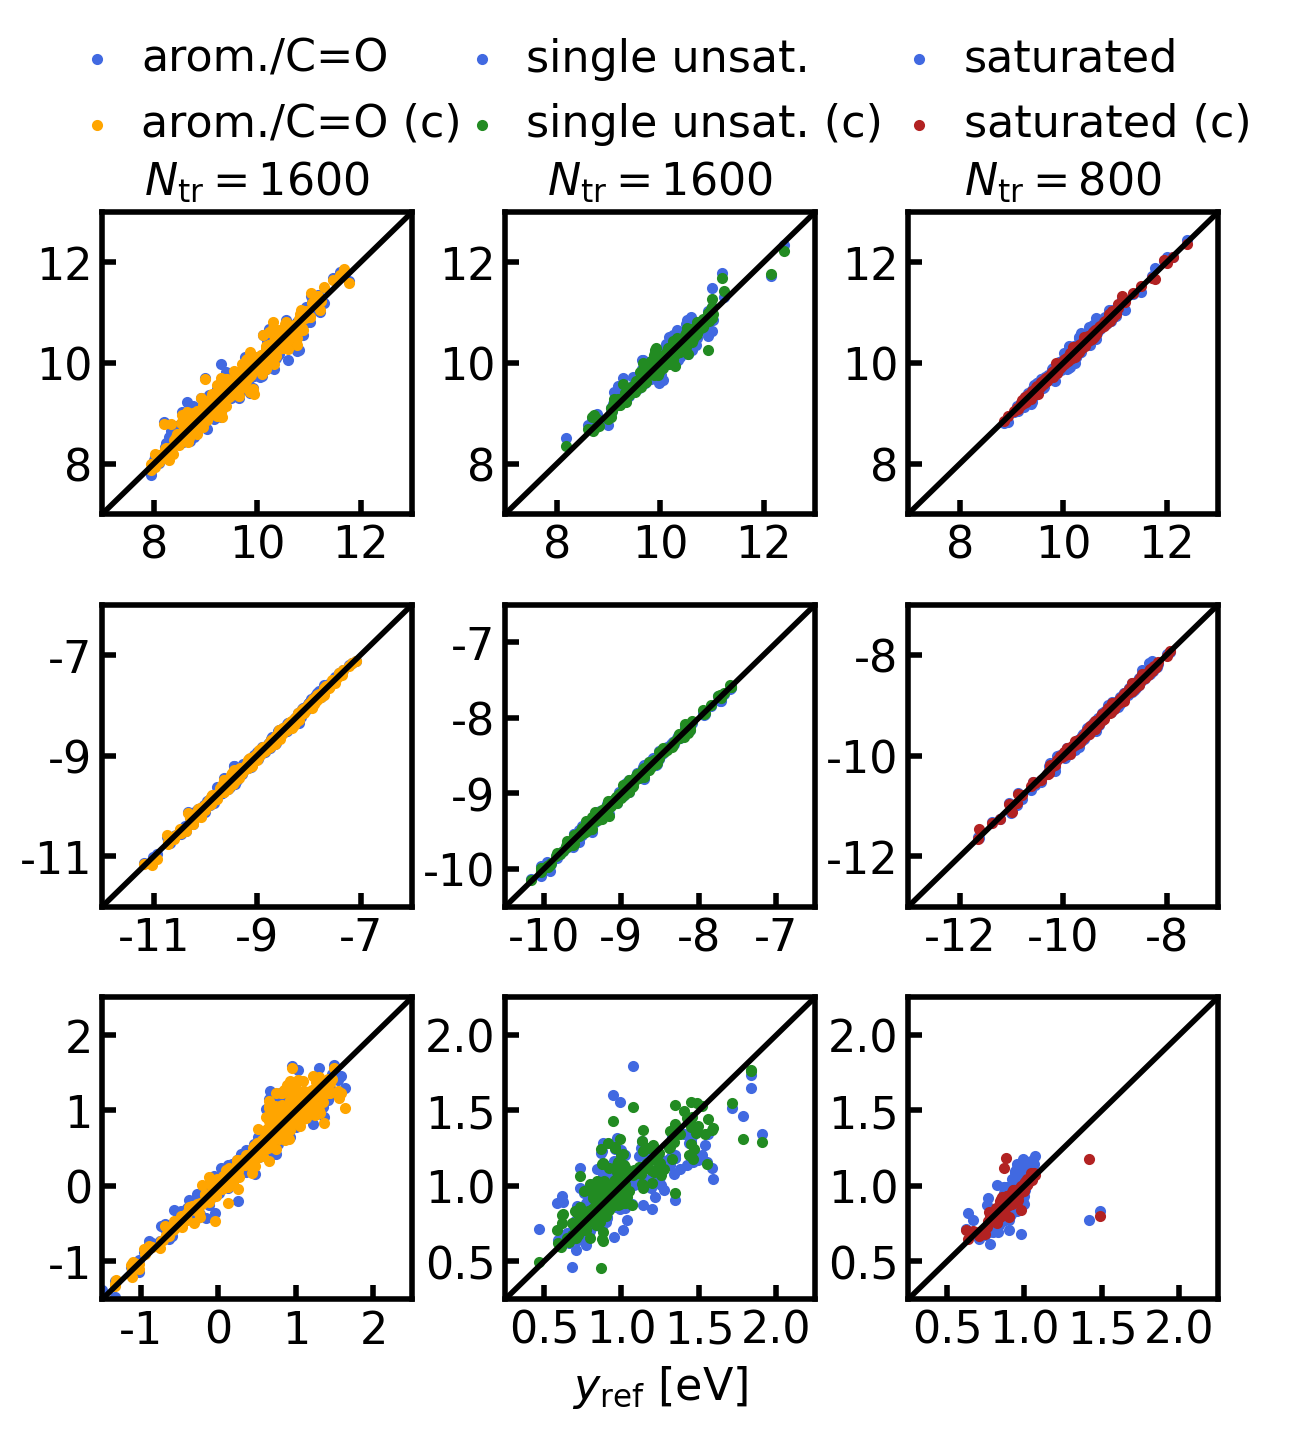

In [199]:
scatter_subplots_array(res_delta, props_pbe0_gw, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, y_labels, 
                       True, 'figures/tmp/scatter_qm7b_delta_pbe0_gw.png')

In [176]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 0, 1600)

(3.780535676426428, 9.0489)

In [177]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 1, 1600)

(5.0042075530102395, 8.29933884012598)

In [178]:
get_min_max_values(res_delta['(G_ZINDO,G_PBE0)'], 2, 800)

(5.795885492343858, 10.828942810510192)

In [179]:
xticks_delta['(G_ZINDO,G_PBE0)'] = {0: [3, 5, 7, 9], 
                                    1: [5, 6, 7, 8], 
                                    2: [6, 8, 10]}

In [180]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 0, 1600)

(-8.848901477905647, -5.1164)

In [181]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 1, 1600)

(-8.091823341795422, -5.743660154293867)

In [182]:
get_min_max_values(res_delta['(H_ZINDO,H_PBE0)'], 2, 800)

(-9.1613, -5.881358936405201)

In [183]:
xticks_delta['(H_ZINDO,H_PBE0)'] = {0: [-9, -7, -5], 
                                    1: [-8, -7, -6, -5], 
                                    2: [-9, -8, -7, -6]}

In [184]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 0, 1600)

(-3.4251, 0.2655340524817116)

In [185]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 1, 1600)

(-1.3227728206084193, 0.25828963322483434)

In [186]:
get_min_max_values(res_delta['(L_ZINDO,L_PBE0)'], 2, 800)

(-0.7030011418093554, 0.7788262835052859)

In [187]:
xticks_delta['(L_ZINDO,L_PBE0)'] = {0: [-3, -2, -1, 0], 
                                    1: [-1.5, -0.5, 0.5], 
                                    2: [-0.5, 0, 0.5, 1.0]}

In [188]:
props_zindo_pbe0 = ['(G_ZINDO,G_PBE0)', '(H_ZINDO,H_PBE0)', '(L_ZINDO,L_PBE0)']

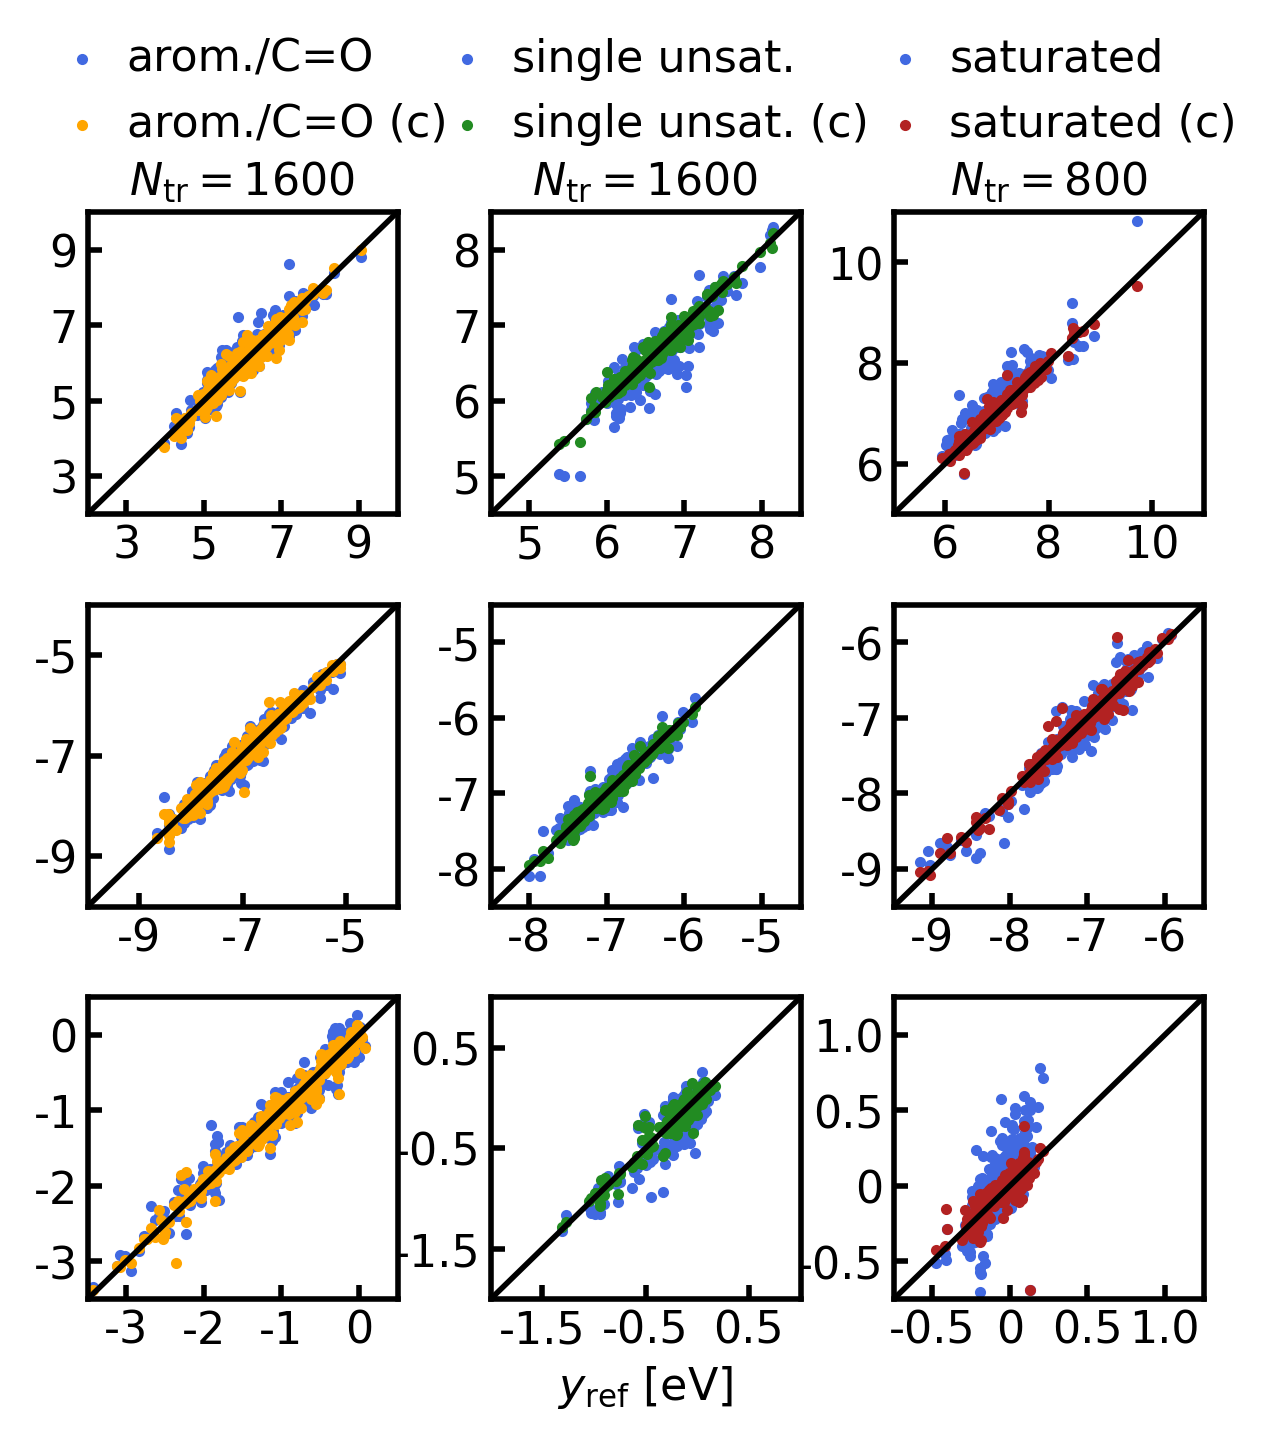

In [200]:
scatter_subplots_array(res_delta, props_zindo_pbe0, [0, 1, 2], train_sizes_qm7b, color, color_subsets, labels_qm7b, xticks_delta, y_labels, 
                       True, 'figures/tmp/scatter_qm7b_delta_zindo_pbe0.png')